In [51]:

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pypopulation
warnings.filterwarnings("ignore")
import random
import statistics
import statistics
from matplotlib.ticker import MaxNLocator
import iso3166
import pycountry
import plotly
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import os
os.chdir("/Users/alexesmerritt/Library/CloudStorage/GoogleDrive-akm147@georgetown.edu/My Drive/citation_bias/")

authorship_hc=pd.read_csv('dworkin_code_api/highlycited/df9_consensus_authorship_public.csv')
# authorship_books=pd.read_csv('dworkin_code_api/books/df9_consensus_authorship_public.csv')

df_hc=pd.read_csv('dworkin_code_api/highlycited/df9_articledata_0.7_public.csv')
# df_hc_60=pd.read_csv('dworkin_code_api/highlycited/df9_articledata_0.6_public.csv')
# df_hc_80=pd.read_csv('dworkin_code_api/highlycited/df9_articledata_0.8_public.csv')
# df_books=pd.read_csv('dworkin_code_api/books/df9_articledata_0.7_public.csv')


df_cited_hc=pd.read_csv('dworkin_code_api/highlycited/df9_consensus_citation_public.csv')
# df_cited_books=pd.read_csv('dworkin_code_api/books/df9_relevant_citations_90_public.csv')
# df_cited_hc_75=pd.read_csv('dworkin_code_api/highlycited/df9_relevant_citations_75_public.csv')
df_hc

article_id    PY  AG ARbin_ethni FA_genderize LA_genderize  \
0                1  2019  MU          NN            M            U   
1                2  2019  MM          NN            M            M   
2                3  2019  WM          NN            W            M   
3                4  2019  WM          WW            W            M   
4                5  2019  MM          NN            M            M   
...            ...   ...  ..         ...          ...          ...   
216907      216908  1971  MM          UU            M            M   
216908      216909  1970  MU          UW            M            U   
216909      216910  1977  MU          WW            M            U   
216910      216911  1976  MM          UU            M            M   
216911      216912  1971  WW          UW            W            W   

       FA_ethni_race LA_ethni_race FA_binrace_ethni LA_binrace_ethni  \
0                  A             A                N                N   
1                  A             A                N                N   
2                  A             A                N                N   
3               W_NL          W_NL                W                W   
4                  A             A                N                N   
...              ...           ...              ...              ...   
216907             U             U                U                U   
216908             U          W_NL                U                W   
216909          W_NL          W_NL                W                W   
216910             U             U                U                U   
216911             U          W_NL                U                W   

                               Country  global_north  has_single_author  
0                      peoples r china             0              False  
1                      peoples r china             0              False  
2                      peoples r china             0              False  
3                             slovenia             1              False  
4                      peoples r china             0              False  
...                                ...           ...                ...  
216907                             NaN             0               True  
216908                             NaN             0              False  
216909  united kingdom (great britain)             0              False  
216910  united kingdom (great britain)             0               True  
216911                             NaN             0               True  

[216912 rows x 13 columns]

In [50]:
def fix_countries(df):
    df['Country']=df['Country'].replace({'england':'United Kingdom (Great Britain)',
                                 'north ireland':'United Kingdom (Great Britain)',
                                 'wales':'United Kingdom (Great Britain)',
                                 'scotland':'United Kingdom (Great Britain)'})
    df['Country']=df['Country'].str.lower()
    df['global_north'].loc[df['Country']=='united kingdom (great britain)']=1

    return df

df_hc=fix_countries(df_hc)
# df_hc_60=fix_countries(df_hc_60)
# df_hc_80=fix_countries(df_hc_80)
# df_books=fix_countries(df_books)


In [3]:

def remove_self_citations(df):
    df=df.loc[df['cited_first']!=df['citing_first']]
    df=df.loc[df['cited_first']!=df['citing_last']]
    df=df.loc[df['cited_last']!=df['citing_first']]
    df=df.loc[df['cited_last']!=df['citing_last']]

    return df

# Figure 0

In [4]:

ISO = {'AD': 'Andorra','AE': 'U Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda',
	'AI': 'Anguilla','AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles',
	'AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina','AS': 'American Samoa','AT': 'Austria',
	'AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina','BB': 'Barbados',
	'BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain',
	'BI': 'Burundi','BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil',
	'BS': 'Bahama','BT': 'Bhutan','BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana',
	'BY': 'Belarus','BZ': 'Belize','CA': 'Canada','CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic',
	'CG': 'Dem Rep Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)','CK': 'Cook Iislands',
	'CL': 'Chile','CM': 'Cameroon','CN': 'Peoples R China','CO': 'Colombia','CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)','CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island',
	'CY': 'Cyprus','CZ': 'Czech Republic','DD': 'Fed Rep Ger','DE': 'Germany','DJ': 'Djibouti',
	'DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
	'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia',
	'FI': 'Finland','FJ': 'Fiji','FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands',
	'FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon','GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar','GL': 'Greenland',
	'GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands','GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau',
	'GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras','HR': 'Croatia',
	'HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India',
	'IO': 'British Indian Ocean Territory','IQ': 'Iraq','IR': 'Iran','IS': 'Iceland','IT': 'Italy',
    'JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya','KG': 'Kyrgyzstan','KH': 'Cambodia',
	'KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'South Korea','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Laos','LB': 'Lebanon',
	'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania',
	'LU': 'Luxembourg','LV': 'Latvia','LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco',
	'MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali','MK':'North Macedonia',
	'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique',
	'MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta','MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi',
	'MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia',
	'NE': 'Niger','NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands',
	'NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)','NU': 'Niue',
    'NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea',
    'PH': 'Philippines','PK': 'Pakistan','PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn',
	'PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
	'RO': 'Romania','RU': 'Russia','RS':'Serbia','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands',
	'SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden','SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
	'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)','SV': 'El Salvador','SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
	'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia',
	'TO': 'Tonga','TP': 'East Timor','TR': 'Turkey','TT': 'Trinidad Tobago','TV': 'Tuvalu','TW': 'Taiwan',
	'TZ': 'Tanzania','UA': 'Ukraine','UG': 'Uganda','UM': 'United States Minor Outlying Islands',
    'US': 'usa','UY': 'Uruguay','UZ': 'Uzbekistan','VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands','VI': 'United States Virgin Islands',
	'VN': 'Vietnam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe',
       'CD':'Democratic Republic of the Congo','SS':'South Sudan'
      }
ISO = {v: k for k, v in ISO.items()}
ISO =  {k.lower(): v for k, v in ISO.items()}


In [5]:
import matplotlib
def dataframe_creation_map(df0,authorship,title):
    country_paper=pd.DataFrame(columns=['Country','PPM','Raw_papers','Global_North'])
    countries=list(ISO.keys())
    df=pd.merge(df0,authorship,how='inner')

    for country in df['Country'].unique():
        try:
            country1=ISO[country]
            info = pycountry.countries.get(alpha_2=country1)
            country3=info.alpha_3

            df_country=df.loc[df['Country']==country]
            papers=len(df_country)
            try:
                pop=pypopulation.get_population(country1)
                ppm=papers/(pop/1000000)

            except:
                ppm=0
            try:
                GN=list(df_country['global_north'].unique())[0]

                if GN==1:
                    GN='Global North'
                else:
                    GN='Global South'
            except: GN='Global South'
            if pop>1000000:
                df2 = pd.DataFrame([[country3,ppm,papers,GN]],columns=['Country','PPM','Raw_papers','Global_North'])
                country_paper=pd.concat([df2, country_paper])

        except:
            df2 = pd.DataFrame([[country3,ppm,papers,GN]],columns=['Country','PPM','Raw_papers','Global_North'])
            country_paper=pd.concat([df2, country_paper])
    country_paper=country_paper.sort_values('PPM')
    country_paper['Raw_papers']=country_paper['Raw_papers'].astype(float)
    country_paper['Country'].unique()

    country_paper=country_paper.reset_index()



    years=[]
    papers=[]
    for year in df['PY'].unique():
        df_year=df.loc[df['PY']==year]
        paper=len(df_year['article_id'].unique())
        years.append(year)
        papers.append(paper)

 
    df_authorship_count=pd.DataFrame({'Year':years,'Papers':papers})

    

    return country_paper,df_authorship_count
country_paper_hc,hc_author_count=dataframe_creation_map(df_hc,authorship_hc,'hc')
# country_paper_books,books_author_count=dataframe_creation_map(df_books,authorship_books,'books')


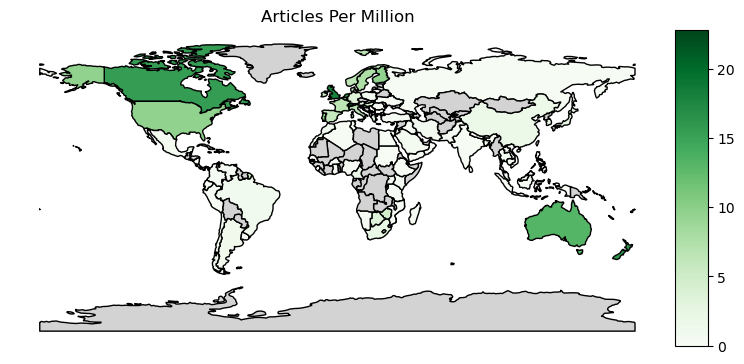

In [6]:
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
world = geopandas.read_file('make_figures/inputs/ne_110m_admin_0_countries.shp')
world=pd.merge(country_paper_hc,world,right_on='ADM0_A3',left_on='Country',how='right')
world=geopandas.GeoDataFrame(world)
world.crs = 'epsg:3395'
fig, ax = plt.subplots(1, 1,figsize=(9,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='PPM',cmap='Greens',edgecolor='black',legend=True,figsize=(10,10),ax=ax,cax=cax,missing_kwds={
             'color': 'lightgray',  # Color for NaN values
             'label': 'Missing Data',  # Label for the legend
             'markersize': 10  # Marker size for NaN values
         })
ax.axis('off')
ax.set_title('Articles Per Million')
plt.savefig('make_figures/fig0a.png',dpi=1000)

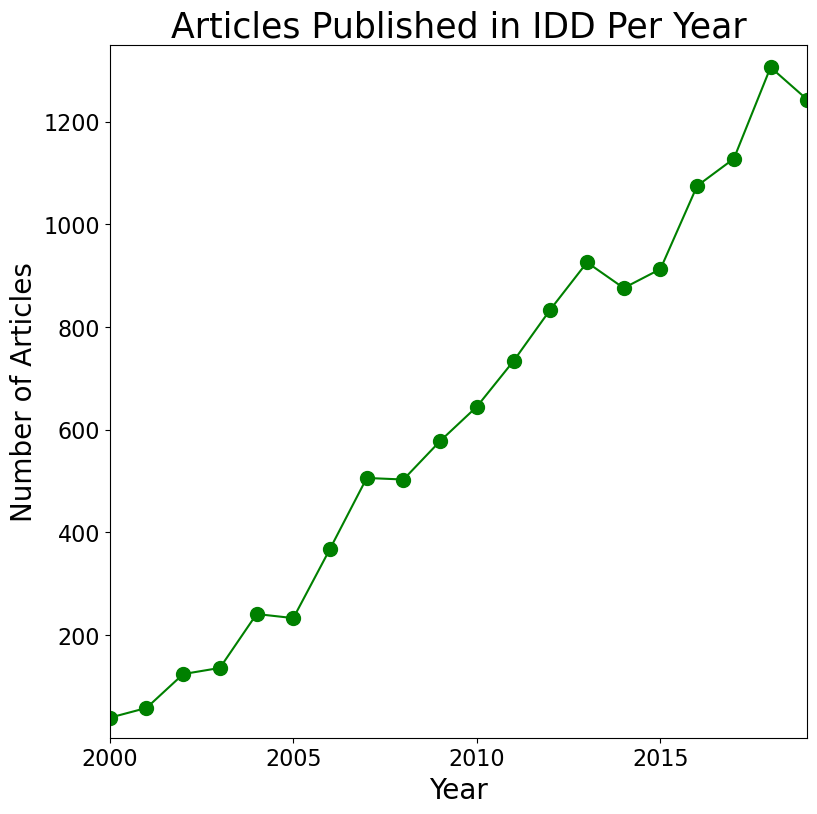

In [7]:

fig, ax = plt.subplots(1, 1,figsize=(9,9))
hc_author_count.plot(y='Papers',x='Year',ax=ax,marker='o',ms=10,color='green')
ax.set_xticks((2000,2005,2010,2015))
ax.set_yticks((200,400,600,800,1000,1200))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Number of Articles', fontsize=20)
ax.set_ylim(0,1350)
ax.set_xlim(2000,2019)
ax.set_title('Articles Published in IDD Per Year',fontsize=25)
ax.get_legend().remove()
plt.savefig('make_figures/fig0b.png',dpi=1000)

## GENDER AUTHORSHIP DATA

In [21]:
def gender_authorship_part1(df,authorship,dataset,scope,author,model):
    df=pd.merge(df,authorship,how='inner')
    df=df.loc[df['PY']>=2000]
    
    

    ##Altering for scope
    if scope=="USA":
        df=df.loc[df['Country']=='usa']

    if scope=='Global North':
        df=df.loc[df['global_north']==1]

    if scope=='UK':
        df=df.loc[df['Country']=='united kingdom (great britain)']

    ##############################  CREATING DATAFRAME FOR FIRST/LAST AUTHOR    ##############################
    ##Filtering for inclusion in figure 1a
    #CREATING DF BY MLM AND AUTHOR TYPE
    if model=='Genderize': 
        if author=='LA':
            df_authors=df.rename(columns={'LA_genderize':'Gender','PY':'Year'})[['Year','article_id','Gender']]
        if author=='FA':
            df_authors=df.rename(columns={'FA_genderize':'Gender','PY':'Year'})[['Year','article_id','Gender']]
    if model=='Namsor':
        if author=='LA':
            df_authors=df.rename(columns={'LA_gender':'Gender','PY':'Year'})[['Year','article_id','Gender']]
        if author=='FA':
            df_authors=df.rename(columns={'FA_gender':'Gender','PY':'Year'})[['Year','article_id','Gender']]

    ######## ONLY ARTICLES WITH BOTH AUTHOR GENDERS REPORTED ########
    genders=['M','W']
    df_authors=df_authors.loc[df_authors['Gender'].isin(genders)]
   


    ##############################  CREATING DATAFRAME FOR AUTHOR PAIRINGS     ##############################
    ######## ONLY ARTICLES WITH BOTH AUTHOR GENDERS REPORTED, RENAMINS CORRESPONDING COLUMN FOR MLM ########
    accepted_groupings=['WW','WM','MW','MM']
    if model=='Genderize':
        ##selecting appropriate MLM model
        df_removed_singles=df.rename(columns={'AG':'Pairings'})
        ##removing papers with missing author gender data
        df_removed_singles=df_removed_singles.loc[df_removed_singles['Pairings'].isin(accepted_groupings)]
    else:
        ##selecting appropriate MLM model
        df_removed_singles=df.rename(columns={'AG_namsor':'Pairings'})
        ##removing papers with missing author gender data
        df_removed_singles=df_removed_singles.loc[df_removed_singles['Pairings'].isin(accepted_groupings)]
    #################################  REMOVING PAPERS WITH SINGLE AUTHORS ################################# 
    df_removed_singles=df_removed_singles.loc[df_removed_singles['has_single_author']==False]



    #FOR NON PUBLIC FILES
    ##removing self citations andfor pairings dataframes
    ### df_removed_singles=df.loc[df['first_auth']!=df['last_auth']]


    
    ##################################  CALCULATING COUNTS FOR YEAR #########################################
    years=df_authors['Year'].unique() # list of years to loop thorugh
    ##Prepping Data 
    df_yearly_author=pd.DataFrame(columns=['Year','Woman','Man'])
    df_yearly=pd.DataFrame(columns=['Year','WW','WM','MW','MM','WW_std','WM_std','MW_std','MM_std''count'])
    
    
    for year in years:
        df_year_authors=df_authors.loc[df_authors['Year']==year]  #Adjusting first/last author df to the year
        df_year=df_removed_singles.loc[df_removed_singles['PY']==year] #Adjusting author pairing df to the year
        LA_genders=list(df_year_authors['Gender']) ##List of author genders in a given year
        pairings=list(df_year['Pairings']) ##List of author pairings in a given year
        num_author_papers=len(df_year_authors)  #number of articles with authors reported in a given year
        num_pairings_papers=len(df_year)  #number of articles with authors pairings reported in a given year
        w=[]
        m=[]
        ww=[]
        wm=[]
        mw=[]
        mm=[]
        ##Bootstrappings
        for i in list(range (0,1000)):
            ## RANDOM SELECTION OF AUTHORS WITH REPLACEMENT
            random_authors=random.choices(LA_genders,k=num_author_papers)
            ##COUNTING AUTHORS REPORTED FOR EACH GENDER
            try:
                w1=random_authors.count('W')
            except:
                w1=0
            try:
                m1=random_authors.count('M')
            except:
                m1=0
            
            ##PROPORTION OF AUTHORS OF EACH GENDER IN BOOTSTRAP
            w.append(w1/num_author_papers)
            m.append(m1/num_author_papers)

            ##Bootstrapping for 1b

            random_pairings=random.choices(pairings,k=num_pairings_papers)

            try:
                ww1=random_pairings.count('WW')
            except:
                ww1=0
            try:
                mw1=random_pairings.count('MW')
            except:
                mw1=0

            try:
                wm1=random_pairings.count('WM')
            except:
                wm1=0
            try:
                mm1=random_pairings.count('MM')
            except:
                mm1=0


            num_citations=ww1+mw1+wm1+mm1

            ww.append(ww1/num_citations)
            mw.append(mw1/num_citations)
            wm.append(wm1/num_citations)
            mm.append(mm1/num_citations)

        mm_a=sum(mm)/len(mm)
        wm_a=sum(wm)/len(wm)
        mw_a=sum(mw)/len(mw)
        ww_a=sum(ww)/len(ww)
        mm_std=statistics.stdev(mm)
        mw_std=statistics.stdev(mw)
        wm_std=statistics.stdev(wm)
        ww_std=statistics.stdev(ww)
        df2=pd.DataFrame({'Year':year,'WW':ww_a,'WM':wm_a,'MW':mw_a,'MM':mm_a,'WW_std':ww_std,'WM_std':wm_std,'MW_std':mw_std,'MM_std':mm_std,'count':num_citations}, index=[0])
        df_yearly=pd.concat([df_yearly,df2])

        man=sum(m)/len(m)
        woman=sum(w)/len(w)
        man_std=statistics.stdev(m)
        woman_std=statistics.stdev(w)
        df2=pd.DataFrame({'Year':year,'Man':man,'Woman':woman,'Woman_std':woman_std,'Man_std':man_std}, index=[0])
        df_yearly_author=pd.concat([df_yearly_author,df2])



##Prepping Dataframes
    df_yearly_author.Woman = df_yearly_author.Woman.astype(float)
    df_yearly_author.Man = df_yearly_author.Man.astype(float)
    df_yearly_author.Year = df_yearly_author.Year.astype(float)


    df_yearly_author=df_yearly_author.sort_values(by='Year').reset_index()

    df_yearly.WW = df_yearly.WW.astype(float)
    df_yearly.MW = df_yearly.MW.astype(float)
    df_yearly.WM = df_yearly.WM.astype(float)
    df_yearly.MM = df_yearly.MM.astype(float)
    df_yearly.Year = df_yearly.Year.astype(float)


    df_yearly=df_yearly.sort_values(by='Year').reset_index()
    return df_yearly,df_yearly_author




def gender_authorship_data(df,authorship,dataset,scope,author,model):
    #Calculating the authorship proportions for the opposite author, in order to calculate expected groupings
    if author=='LA':
        df_yearly,df_yearly_author=gender_authorship_part1(df,authorship,dataset,scope,author,model)
        LA_yearly=df_yearly
        LA_yearly_author=df_yearly_author
        FA_yearly,FA_yearly_author=gender_authorship_part1(df,authorship,dataset,scope,'FA',model)
        
        LA_women=float(LA_yearly_author['Woman'].iloc[-1])
        LA_men=1-LA_women
        FA_women=float(FA_yearly_author['Woman'].iloc[-1])
        FA_men=1-FA_women
        women=LA_women
        men=LA_men
    if author=='FA':
        df_yearly,df_yearly_author=gender_authorship_part1(df,authorship,dataset,scope,author,model)
        FA_yearly=df_yearly
        FA_yearly_author=df_yearly_author

        LA_yearly,LA_yearly_author=gender_authorship_part1(df,authorship,dataset,scope,'LA',model)

        LA_women=float(LA_yearly_author['Woman'].iloc[-1])
        LA_men=1-LA_women
        FA_women=float(FA_yearly_author['Woman'].iloc[-1])
        FA_men=1-FA_women
        women=FA_women
        men=FA_men
    
    
    genders=[LA_women,LA_men,FA_women,FA_men,women,men]
    df_genders=pd.DataFrame(genders,columns=['Items'])
    df_genders.to_csv('Data/Fig_1/df_fig1_genders_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')
    df_yearly.to_csv('Data/Fig_1/df_fig1_pairings_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')
    df_yearly_author.to_csv('Data/Fig_1/df_fig1_authors_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')



gender_authorship_data(df_hc,authorship_hc,'Highly Cited','World','LA','Genderize')
# gender_authorship_data(df_hc,authorship_hc,'Highly Cited','World','FA','Genderize')
# gender_authorship_data(df_hc_60,authorship_hc,'Highly Cited_60','World','LA','Genderize')
# gender_authorship_data(df_hc_80,authorship_hc,'Highly Cited_80','World','LA','Genderize')


# gender_authorship_data(df_hc,authorship_hc,'Highly Cited','Global North','LA','Genderize')
# gender_authorship_data(df_hc,authorship_hc,'Highly Cited','USA','LA','Genderize')
# gender_authorship_data(df_hc,authorship_hc,'Highly Cited','UK','LA','Genderize')

# gender_authorship_data(df_books,authorship_books,'Books','World','LA','Genderize')

# fgender_authorship_data(df_hc,authorship_hc,'Highly Cited','World','LA','Namsor')


True


## Gender Citation Data

In [58]:
def gender_citation_data(df, df_cited,dataset,scope,model):
    df_cited=df_cited.rename(columns={'article_id':'cited_article','in_bib_of_article_id':'citing_article'})
########################### ADDING GENDERS OF AUTHORS CITED AND CITING  #####################################
    if model=='Genderize':
        #### REMOVING SINGLE AUTHORS FROM MERGING
        df_gender1=df.loc[df['has_single_author']==False][['article_id', 'AG']]
        df_gender2=df.loc[df['has_single_author']==False][['article_id', 'AG','global_north','Country']]
        #### ADD CITED AUTHORS GENDER 
        df_cited=df_cited.merge(df_gender1, left_on='cited_article', right_on='article_id')
        df_cited=df_cited.rename(columns={'AG':'cited_gender'})
        #### ADD CITING AUTHORS GENDER
        df_cited=df_cited.merge(df_gender2, left_on='citing_article', right_on='article_id')
        df_cited=df_cited.rename(columns={'AG':'citing_gender'})
        df_cited=df_cited.drop(columns={'article_id_x','article_id_y'})
    if model=='Namsor':
        #### REMOVING SINGLE AUTHORS FROM MERGING
        df_gender1=df[['UT', 'AG_namsor', 'first_auth','last_auth']]
        df_gender2=df[['UT', 'AG_namsor','global_north','Country', 'first_auth','last_auth']]
        #### ADD CITED AUTHORS GENDER 
        df_cited=df_cited.merge(df_gender1, left_on='cited_article', right_on='UT')
        df_cited=df_cited.rename(columns={'AG_namsor':'cited_gender','first_auth':'cited_first','last_auth':'cited_last'})
        #### ADD CITING AUTHORS GENDER
        df_cited=df_cited.merge(df_gender2, left_on='citing_article', right_on='UT')
        df_cited=df_cited.rename(columns={'AG_namsor':'citing_gender','first_auth':'citing_first','last_auth':'citing_last'})
        df_cited=df_cited.drop(columns={'UT_x','UT_y'})

   
    accepted_groups=['WW','WM','MW','MM']

    #Removing papers where there are missing genders or threshold is too low
    df_cited=df_cited.loc[df_cited['citing_gender'].isin(accepted_groups)]
    df_cited=df_cited.loc[df_cited['cited_gender'].isin(accepted_groups)]
    ##REMOVING SELF CITATIONS:
    df_cited=df_cited.loc[df_cited['is_self_cite']==0]
    
    # Adjusting dataframe to scope of the analysis 
    if scope=='Global North':
        df_cited=df_cited.loc[df_cited['global_north']==1]
    if scope=='UK':
        df_cited=df_cited.loc[df_cited['Country']=='united kingdom (great britain)']
    if scope=='USA':
        df_cited=df_cited.loc[df_cited['Country']=='usa']


    groups_of_study=[['MM'],['WW']]
    for x in list(range(0,2)):
        group=groups_of_study[x]
        ##Creating dataframe to store information
        df_citation_comp=pd.DataFrame()
        df_author=df_cited.loc[df_cited['citing_gender'].isin(group)] ## Specifiying if cited author is MM or WW
        df_author=df_author.loc[df_author['PY']>=2000] ## Only viewing papers written on or after 2000
        for year in list(df_author['PY'].unique()): ## Looping through years
            df_year=df_author.loc[df_author['PY']==year] 
            num_citations=len(df_year) ##Total number of qualified citations in a given year for WW or MM
            num_papers=len(df_year['citing_article'].unique()) ## Number of unique articles in field 
            unique_papers_year=list(df_year['citing_article'].unique()) 
            ww=[]
            mw=[]
            wm=[]
            mm=[]
            for i in list(range (0,10)): ##Bootstrapping 1000 times
                papers=random.choices(unique_papers_year,k=num_papers) ##random selection of citing papers with replacement
                ## Counting different gender pair citations in randomly selected papers
                list_of_count_dicts = [df_year.loc[df_year.citing_article==paper]['cited_gender'].value_counts() for paper in papers]
                counts=pd.DataFrame(list_of_count_dicts)

                try:
                    ww1=counts['WW'].sum()
                except:
                    ww1=0
                try:
                    mw1=counts['MW'].sum()
                except:
                    mw1=0

                try:
                    wm1=counts['WM'].sum()
                except:
                    wm1=0
                try:
                    mm1=counts['MM'].sum()
                except:
                    mm1=0


                num_citations=ww1+mw1+wm1+mm1
                ### Adding counts for bootstrapping to list for average and std calculations
                ww.append(ww1/num_citations)
                mw.append(mw1/num_citations)
                wm.append(wm1/num_citations)
                mm.append(mm1/num_citations)


            mm_a=sum(mm)/len(mm)
            wm_a=sum(wm)/len(wm)
            mw_a=sum(mw)/len(mw)
            ww_a=sum(ww)/len(ww)

            mm_std=statistics.stdev(mm)

            wm_std=statistics.stdev(wm)

            mw_std=statistics.stdev(mw)

            ww_std=statistics.stdev(ww)




            df2=pd.DataFrame({'Year':year,'WW':ww_a,'WM':wm_a,'MW':mw_a,'MM':mm_a,
                              'WW_std':ww_std,'WM_std':wm_std,'MW_std':mw_std,'MM_std':mm_std},index=[0])
            df_citation_comp=pd.concat([df2,df_citation_comp],ignore_index=True)


        df_citation_comp=df_citation_comp.sort_values('Year')
        df_yearly=df_citation_comp
        #df_citation_comp['total']=df_citation_comp['MM']+df_citation_comp['WM']+df_citation_comp['MW']+df_citation_comp['WW']
        if x==0:
            df_MM=df_yearly
        if x==1:
            df_WW=df_yearly
    
    dfs=[df_MM,df_WW]
    df_MM.to_csv('Data/Fig_2/df_fig2_MM_'+dataset+'_'+model+'_'+scope+'.csv')
    df_WW.to_csv('Data/Fig_2/df_fig2_WW_'+dataset+'_'+model+'_'+scope+'.csv')

# gender_citation_data(df_hc, df_cited_hc,'Highly Cited','World','Genderize')
# gender_citation_data(df_hc, df_cited_hc,'Highly Cited','World','Namsor')
# gender_citation_data(df_books, df_cited_books,'Books','World','Genderize')
# gender_citation_data(df_hc, df_cited_hc_75,'Highlycited_75','World','Genderize')


# gender_citation_data(df_hc_60,df_cited_hc,'Highly Cited_60','World','Genderize')
# gender_citation_data(df_hc_80,df_cited_hc,'Highly Cited_80','World','Genderize')
# gender_citation_data(df_hc, df_cited_hc,'Highly Cited','USA','Genderize')
# gender_citation_data(df_hc, df_cited_hc,'Highly Cited','UK','Genderize')
gender_citation_data(df_hc, df_cited_hc,'Highly Cited','World','Genderize')


# Race Authorship Data

In [73]:
def race_authorship(df,authorship,dataset,scope,author,model):
    df=pd.merge(df,authorship,how='right') ##merging dataframe with races, with dataframe that only has authorship
    #df=df.loc[df['PY']>=2000
################################### ALTERING FOR SCOPE AND MLM PACKAGE #########################################    
    ##Altering for scope
    if scope=="USA":   
        df=df.loc[df['Country']=='usa']
    if scope=='GN':
        df=df.loc[df['global_north']==1]
    if scope=='UK':
        df=df.loc[df['Country']=='united kingdom (great britain)']

    ##Filtering for auhtor position and MLA

    if model=='Ethnicolr':
        if author=='FA':
            column_name='FA_ethni_race'
        if author=='LA':
            column_name='LA_ethni_race'
            print(df[column_name].unique())
    if model=='Namsor':
        if author=='LA':
            column_name='LA_race'
        if author=='FA':
            column_name='FA_race'
############################# Dataframe restructuring and creation to store outputs ###########################    
    ##Creation of a datframe that has first/last author data
    df_authors=df[['PY','article_id',column_name]]
    df_authors=df_authors.rename(columns={column_name:'Race','PY':'Year'})

    races=['W_NL','A','B_NL','HL']
    df_authors=df_authors.loc[df_authors['Race'].isin(races)]
   
    
    ## Creation of dataframes that store counts of each group following bootstrapping 
    df_yearly_author=pd.DataFrame(columns=['Year','A','B','H','W','A_std','B_std','H_std','W_std']) ##For first authors
    
############################### LOOPING THROUGH YEARS FOR COUNTS AND BOOTSTRAPPING #############################
    years=list(df['PY'].unique())
    
    for year in years:
        df_year_authors=df_authors.loc[df_authors['Year']==year]
        ######## CREATING A LIST OF RACES AND PAIRINGS FOR RANDOM SELECTION
        author_race=list(df_year_authors['Race']) ##list of first/last author race
        ##Getting a count of authors and papers for bootrapping
        num_author_papers=len(df_year_authors)

        ##EMPTY Lists for storing
        w=[]
        a=[]
        b=[]
        h=[]
        for i in list(range (0,1000)):
            ##Bootstrapping
            random_authors=random.choices(author_race,k=num_author_papers)
            try:
                w1=random_authors.count('W_NL')
            except:
                w1=0
            try:
                a1=random_authors.count('A')
            except:
                a1=0
            try:
                b1=random_authors.count('B_NL')
            except:
                b1=0
            try:
                h1=random_authors.count('HL')
            except:
                h1=0



            if num_author_papers!=0:
                w.append(w1/num_author_papers)
                a.append(a1/num_author_papers)
                b.append(b1/num_author_papers)
                h.append(h1/num_author_papers)
            else:
                w.append(0)
                a.append(0)
                b.append(0)
                h.append(0)
        ###### Mean and STD of lists from bootstrapping
        w_a=statistics.mean(w)
        h_a=statistics.mean(h)
        b_a=statistics.mean(b)
        a_a=statistics.mean(a)

        w_std=statistics.stdev(w)
        h_std=statistics.stdev(h)
        b_std=statistics.stdev(b)
        a_std=statistics.stdev(a)



        df2=pd.DataFrame({'Year':year,'W':w_a,'B':b_a,'A':a_a,'H':h_a,'W_std':w_std,'B_std':b_std,'A_std':a_std,'H_std':h_std}, index=[0])

        df_yearly_author=pd.concat([df_yearly_author,df2])




    df_yearly_author.W = df_yearly_author.W.astype(float)
    df_yearly_author.B = df_yearly_author.B.astype(float)
    df_yearly_author.A = df_yearly_author.A.astype(float)
    df_yearly_author.H= df_yearly_author.H.astype(float)
    df_yearly_author.Year = df_yearly_author.Year.astype(float)


    df_yearly_author=df_yearly_author.sort_values(by='Year')
    df_yearly_author.to_csv('Data/Fig_3/df_fig3_authors_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')


race_authorship(df_hc,authorship_hc,'Highly Cited','USA','LA','Ethnicolr')
race_authorship(df_hc,authorship_hc,'Highly Cited','UK','LA','Ethnicolr')

# fig3_data(df_books,authorship_books,'Books','USA','LA','Ethnicolr')
# fig3_data(df_books,authorship_books,'Books','UK','LA','Ethnicolr')

# fig3_data(df_hc,authorship_hc,'Highly Cited','USA','FA','Ethnicolr')
# fig3_data(df_hc,authorship_hc,'Highly Cited','UK','FA','Ethnicolr')

# fig3_data(df_hc_60,authorship_hc,'Highly Cited_60','UK','LA','Ethnicolr')
# fig3_data(df_hc_80,authorship_hc,'Highly Cited_80','UK','LA','Ethnicolr') 
# fig3_data(df_hc_60,authorship_hc,'Highly Cited_60','USA','LA','Ethnicolr')
# fig3_data(df_hc_80,authorship_hc,'Highly Cited_80','USA','LA','Ethnicolr') 
# fig3_data(df_hc,authorship_hc,'Highly Cited','World','LA','Ethnicolr')    
# fig3_data(df_hc,authorship_hc,'Highly Cited','USA','LA','Ethnicolr')
# fig3_data(df_hc,authorship_hc,'Highly Cited','UK','LA','Ethnicolr')


Index(['article_id', 'PY', 'AG', 'ARbin_ethni', 'FA_genderize', 'LA_genderize',
       'FA_ethni_race', 'LA_ethni_race', 'FA_binrace_ethni',
       'LA_binrace_ethni', 'Country', 'global_north', 'has_single_author'],
      dtype='object')
['U' 'W_NL' 'A' 'HL' 'B_NL']
       Year  article_id  Race
17     2019          25     U
87     2018         126  W_NL
126    2018         189     A
162    2018         242  W_NL
171    2018         253  W_NL
...     ...         ...   ...
12449  2001       15966  W_NL
12450  2001       15969  W_NL
12453  2000       15972  W_NL
12462  2000       15984  W_NL
12464  2000       15989     U

[3147 rows x 3 columns]
       Year  article_id  Race
87     2018         126  W_NL
126    2018         189     A
162    2018         242  W_NL
171    2018         253  W_NL
217    2017         314  W_NL
...     ...         ...   ...
12448  2001       15964  W_NL
12449  2001       15966  W_NL
12450  2001       15969  W_NL
12453  2000       15972  W_NL
12462  2000      

# Race Citation Data

In [59]:
def race_citation_data(df, df_cited,dataset,scope1,scope2,model):
    ## Ensuring all papers invovled are not single author
    df=df.loc[df['has_single_author']==False]
    ### Renaming columns to make it clearer
    df_cited=df_cited.rename(columns={'article_id':'cited_article','in_bib_of_article_id':'citing_article'})
    if model=='Ethnicolr':
        df_races1=df.loc[df['has_single_author']==False][['article_id', 'ARbin_ethni','global_north']]
        df_races2=df.loc[df['has_single_author']==False][['article_id', 'ARbin_ethni','global_north']]
        df_races2=df_races2.rename(columns={'global_north':'global_north2'})
        #### ADD CITED AUTHORS RACE
        df_cited=df_cited.merge(df_races1, left_on='cited_article', right_on='article_id')
        df_cited=df_cited.rename(columns={'ARbin_ethni':'cited_race'})
        #### ADD CITING AUTHORS RACE
        
        df_cited=df_cited.merge(df_races2, left_on='citing_article', right_on='article_id')
        df_cited=df_cited.rename(columns={'ARbin_ethni':'citing_race'})
        df_cited=df_cited.drop(columns={'article_id_x','article_id_y'})
    
    if model=='Namsor':
        df_races1=df[['UT', 'ARbin_namsor','first_auth','last_auth','global_north']]
        df_races2=df[['UT', 'ARbin_namsor','global_north2','Country','first_auth','last_auth']]
        df_cited=df_cited.merge(df_races1, left_on='cited_article', right_on='UT')
        df_cited=df_cited.rename(columns={'ARbin_namsor':'cited_race','first_auth':'cited_first','last_auth':'cited_last','global_north':'global_north2'})
        df_cited=df_cited.merge(df_races2, left_on='citing_article', right_on='UT')
        df_cited=df_cited.rename(columns={'ARbin_namsor':'citing_race','first_auth':'citing_first','last_auth':'citing_last'})
        df_cited=df_cited.drop(columns={'UT_x','UT_y'})
    

    df_cited=df_cited.loc[df_cited['is_self_cite']==False]## MAKRING SURE NONE OF THE PAPERS ARE SELF CITE
    df_cited=df_cited.loc[df_cited['include_90']==True] ### Making sure we use 90% consensus for the field

    ## Making sure the articles remaining have both races reported
    groups=['WW','WN','NW','NN']
    df_cited=df_cited.loc[df_cited['citing_race'].isin(groups)]
    df_cited=df_cited.loc[df_cited['cited_race'].isin(groups)]
    ### Alterations for scope
    if scope1=='Global North':
        df_cited=df_cited.loc[df_cited['global_north']==1]
        if scope2=='Global North':
            df_cited=df_cited.loc[df_cited['global_north2']==1]
    if scope1=='UK':
        df_cited=df_cited.loc[df_cited['Country']=='united kingdom (great britain)']
    if scope1=='USA':
        df_cited=df_cited.loc[df_cited['Country']=='usa']


############################################## BOOSTRAPPING #################################################
    groups=[['WW'],['NN','WN','NW']] ## How to grouping will work for the analysis
    for x in list(range(0,2)):
        group=groups[x]
        df_citation_comp=pd.DataFrame()
        df_author=df_cited.loc[df_cited['citing_race'].isin(group)]
        df_author=df_author.loc[df_author['PY']>=2000]
        ## Loopingg through years
        for year in list(df_author['PY'].unique()):
            df_year=df_author.loc[df_author['PY']==year]
            unique_papers_year=df_year['citing_article'].unique()
            num_papers=len(unique_papers_year)
            num_citations=len(df_year)
            #creating empty dataset to store results
            ww=[]
            nw=[]
            wn=[]
            nn=[]
            POC=[]
            ##Bootstrapping
            for i in list(range (0,1000)):
                papers=random.choices(unique_papers_year,k=num_papers)
                ##Randomly selecting with replacement for articles published in a given year, and then analyzing their citations
                list_of_count_dicts = [df_year.loc[df_year.citing_article==paper]['cited_race'].value_counts() for paper in papers]
        
                counts=pd.DataFrame(list_of_count_dicts)

                try:
                    ww1=counts['WW'].sum()
                except:
                    ww1=0
                try:
                    nw1=counts['NW'].sum()
                except:
                    nw1=0

                try:
                    wn1=counts['WN'].sum()
                except:
                    wn1=0
                try:
                    nn1=counts['NN'].sum()
                except:
                    nn1=0

                PoC1=nn1+wn1+nw1
                num_citations=ww1+nw1+wn1+nn1

                ww.append(ww1/num_citations)
                nw.append(nw1/num_citations)
                wn.append(wn1/num_citations)
                nn.append(nn1/num_citations)
                POC.append(PoC1/num_citations)

############ Calculating averages and std
            nn_a=sum(nn)/len(nn)
            wn_a=sum(wn)/len(wn)
            nw_a=sum(nw)/len(nw)
            ww_a=sum(ww)/len(ww)
            PoC_a=sum(POC)/len(POC)
            
            nn_std=statistics.stdev(nn)

            wn_std=statistics.stdev(wn)

            nw_std=statistics.stdev(nw)

            ww_std=statistics.stdev(ww)
            
            PoC_std=statistics.stdev(POC)


            df2=pd.DataFrame({'Year':year,'WW':ww_a,'WN':wn_a,'NW':nw_a,'NN':nn_a,
                              'WW_std':ww_std,'WN_std':wn_std,'NW_std':nw_std,'NN_std':nn_std,
                              'ANY_POC':PoC_a,'POC_STD':PoC_std},index=[0])

            df_citation_comp=pd.concat([df2,df_citation_comp],ignore_index=True)


        df_citation_comp=df_citation_comp.sort_values('Year')
        df_yearly=df_citation_comp
        if x==0:
            df_WW=df_yearly
        if x==1:
            df_PoC=df_yearly
    
    df_WW.to_csv('Data/Fig_4/df_fig4_WW_'+dataset+'_'+model+'_'+scope1+'_'+scope2+'.csv')
    df_PoC.to_csv('Data/Fig_4/df_fig4_PoC_'+dataset+'_'+model+'_'+scope1+'_'+scope2+'.csv')
    
    
    
    


fig4_data(df_hc, df_cited_hc,'highly cited','Global North','Global North','Ethnicolr')
# fig4_data(df_books, df_cited_books,'Books','Global North','Global North','Ethnicolr')
# fig4_data(df_hc, df_cited_hc,'Highly Cited','Global North','Global North','Namsor')
# fig4_data(df_hc, df_cited_hc_75,'Highly Cited_75','Global North','Global North','Ethnicolr')
# fig4_data(df_hc_60,df_cited_hc,'Highly Cited_60','Global North','Global North','Ethnicolr')
# fig4_data(df_hc_80,df_cited_hc,'Highly Cited_80','Global North','Global North','Ethnicolr')   


# fig4_data(df_hc, df_cited_hc,'Highly Cited','Global North','World','Ethnicolr')


# GRAPHS

## Gender Graphs

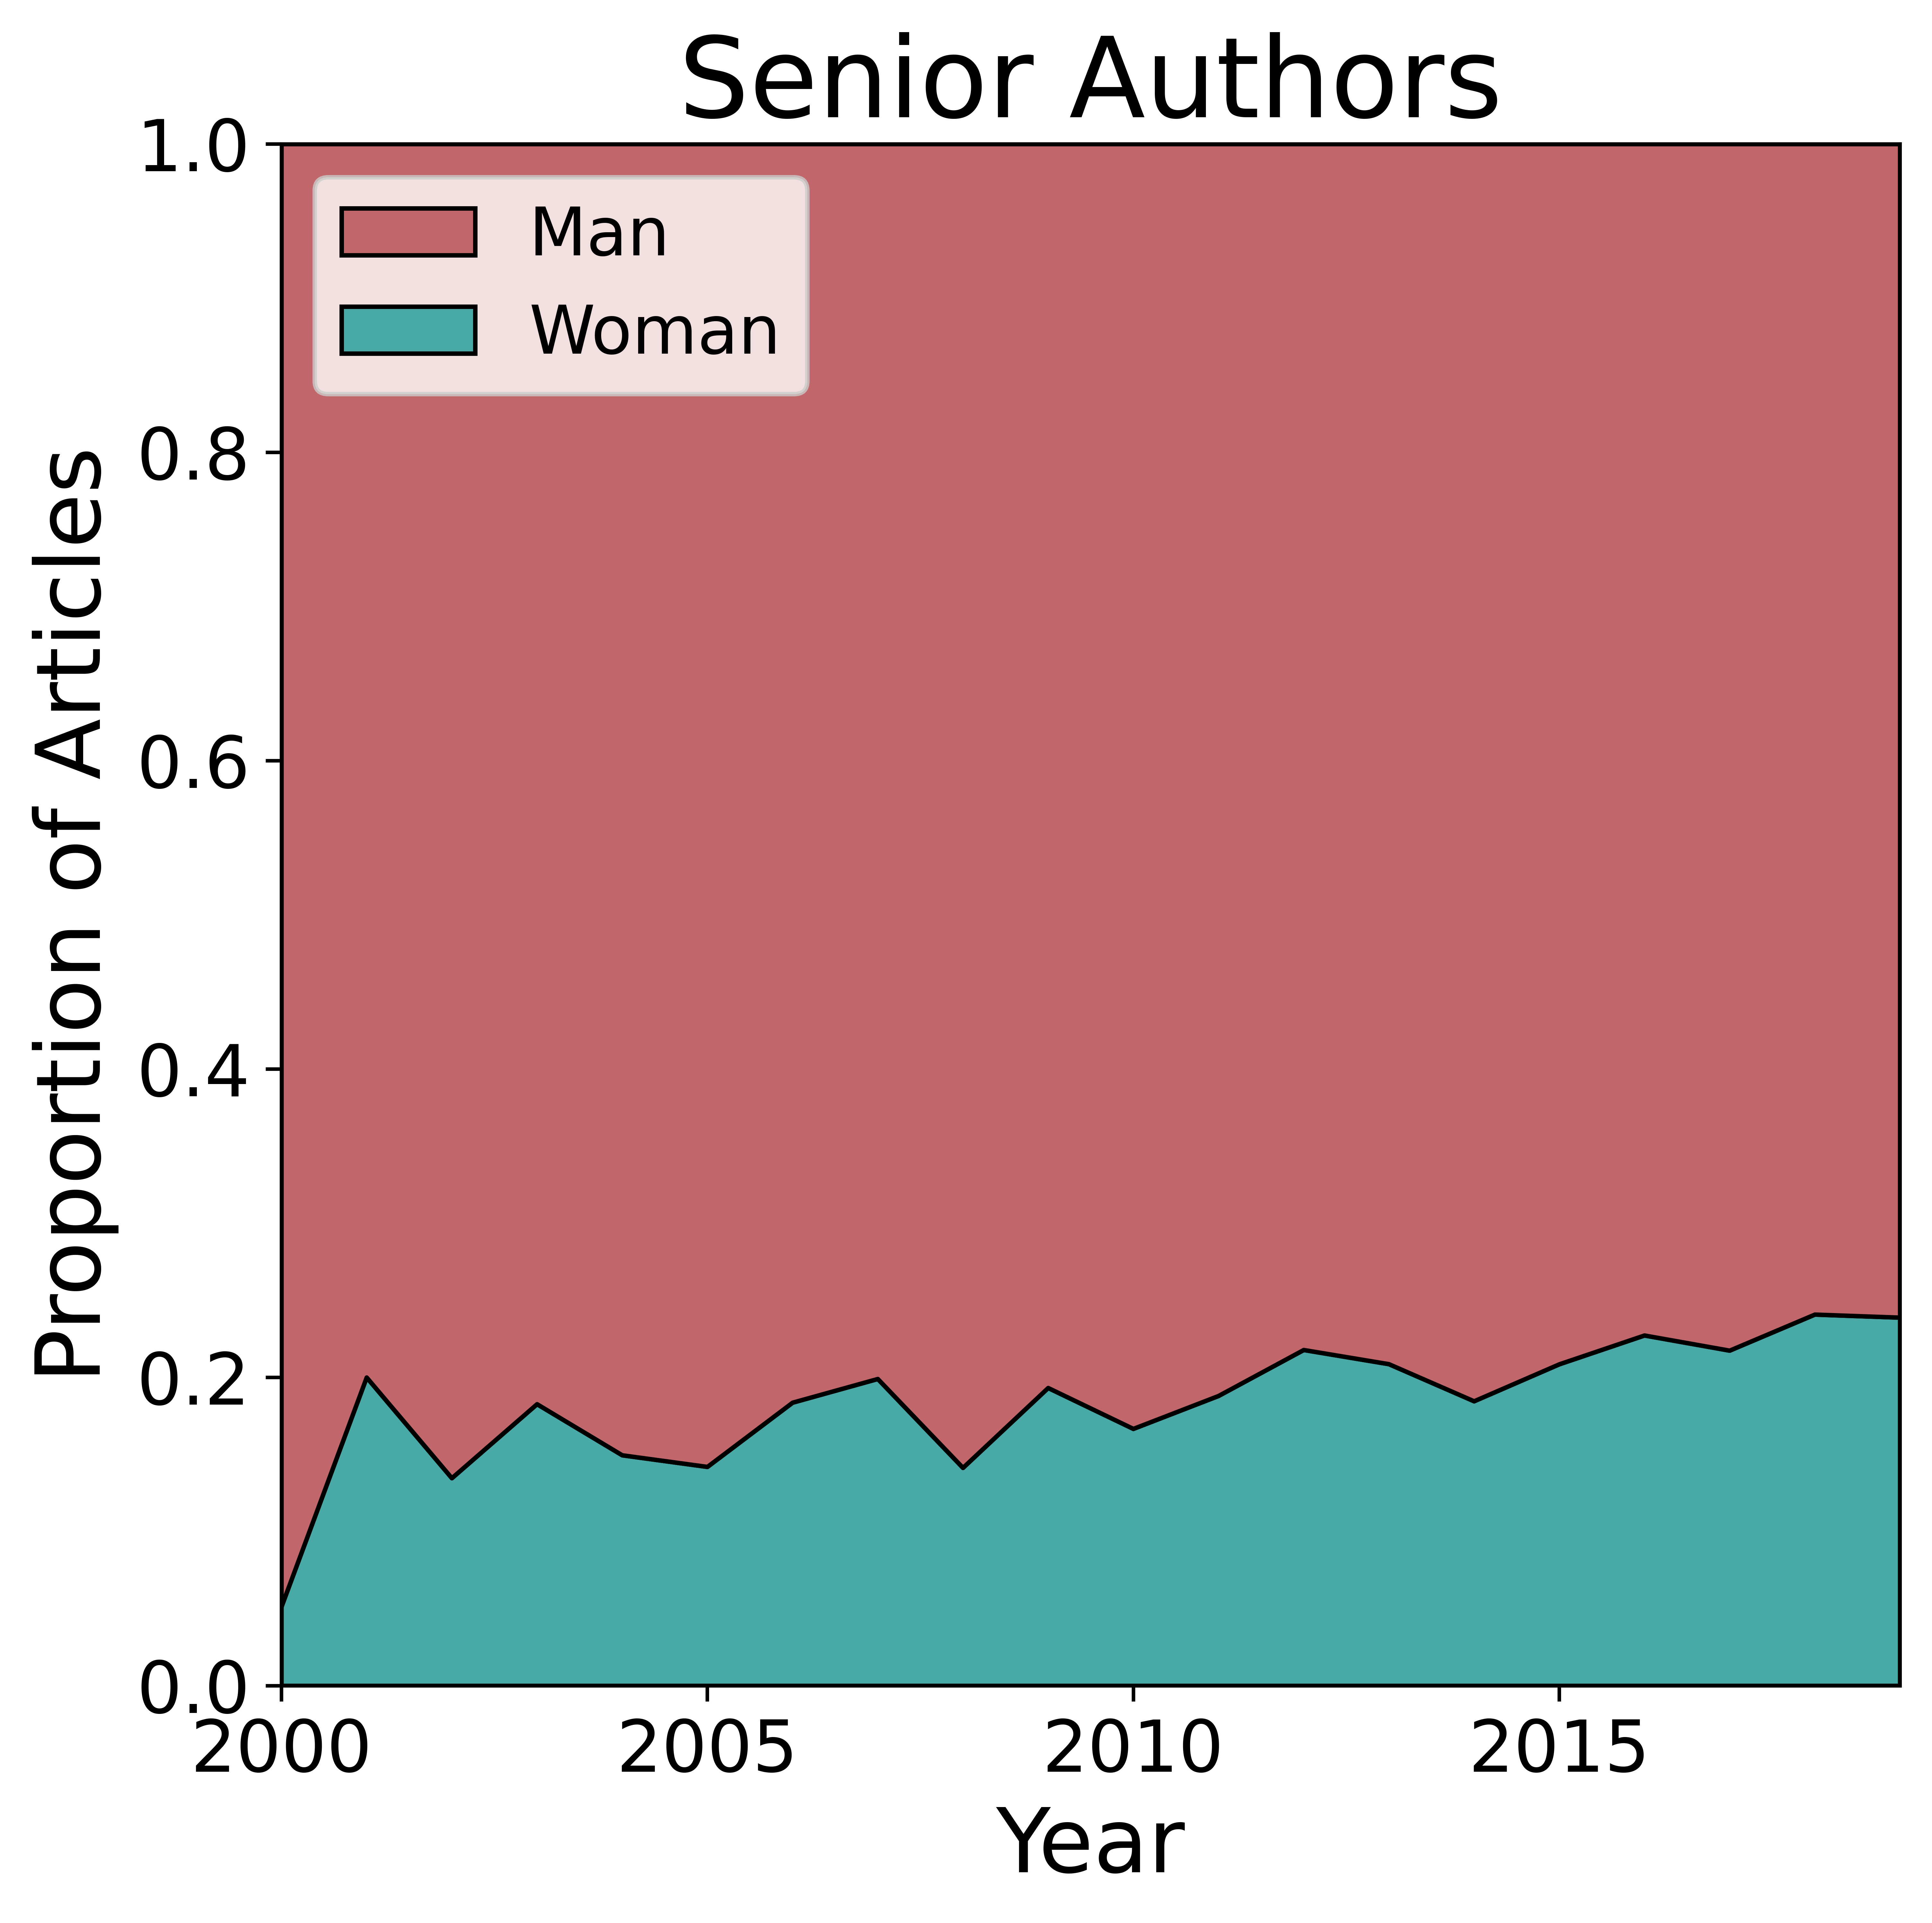

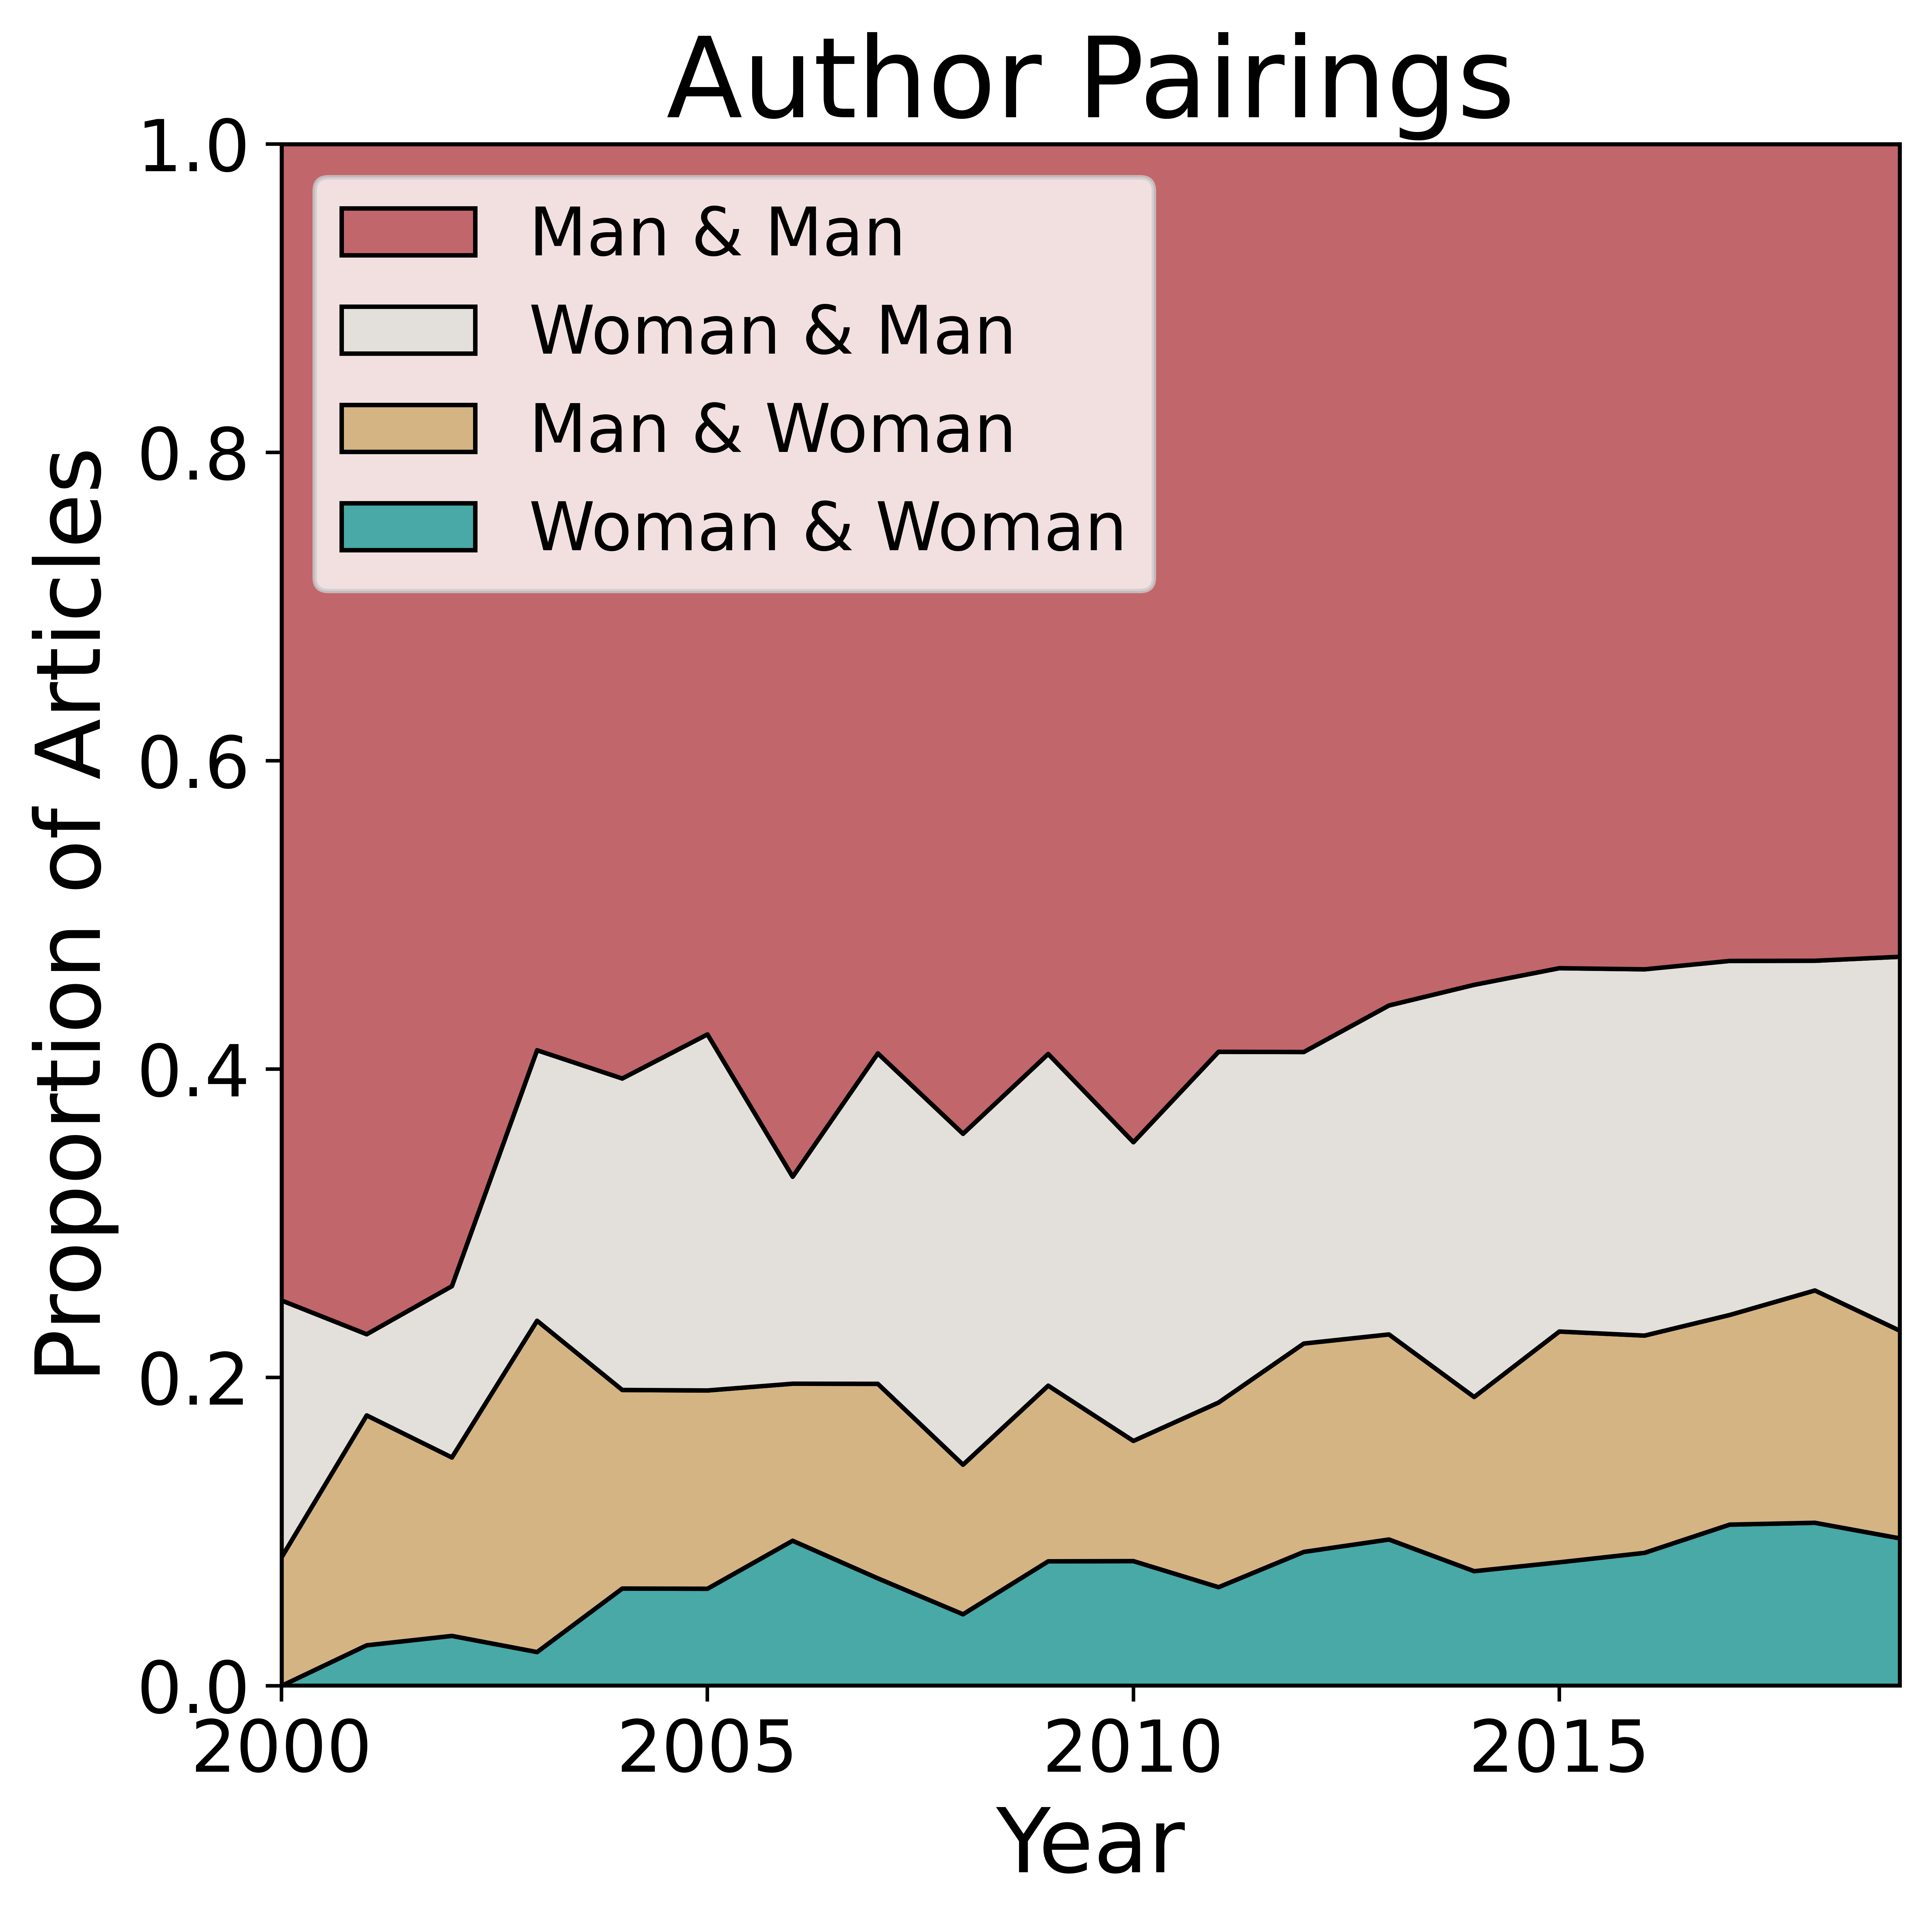

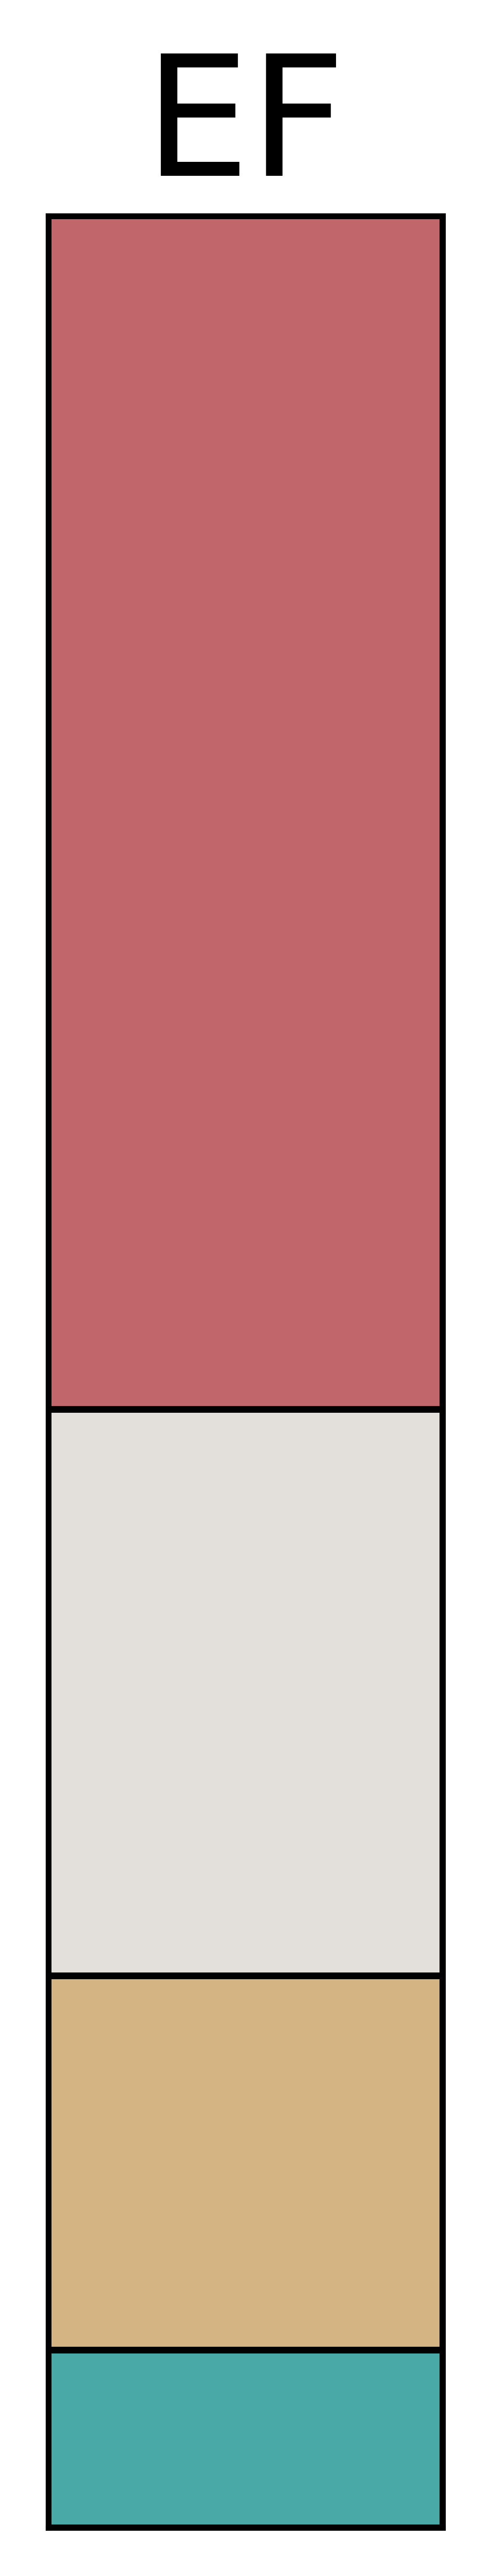

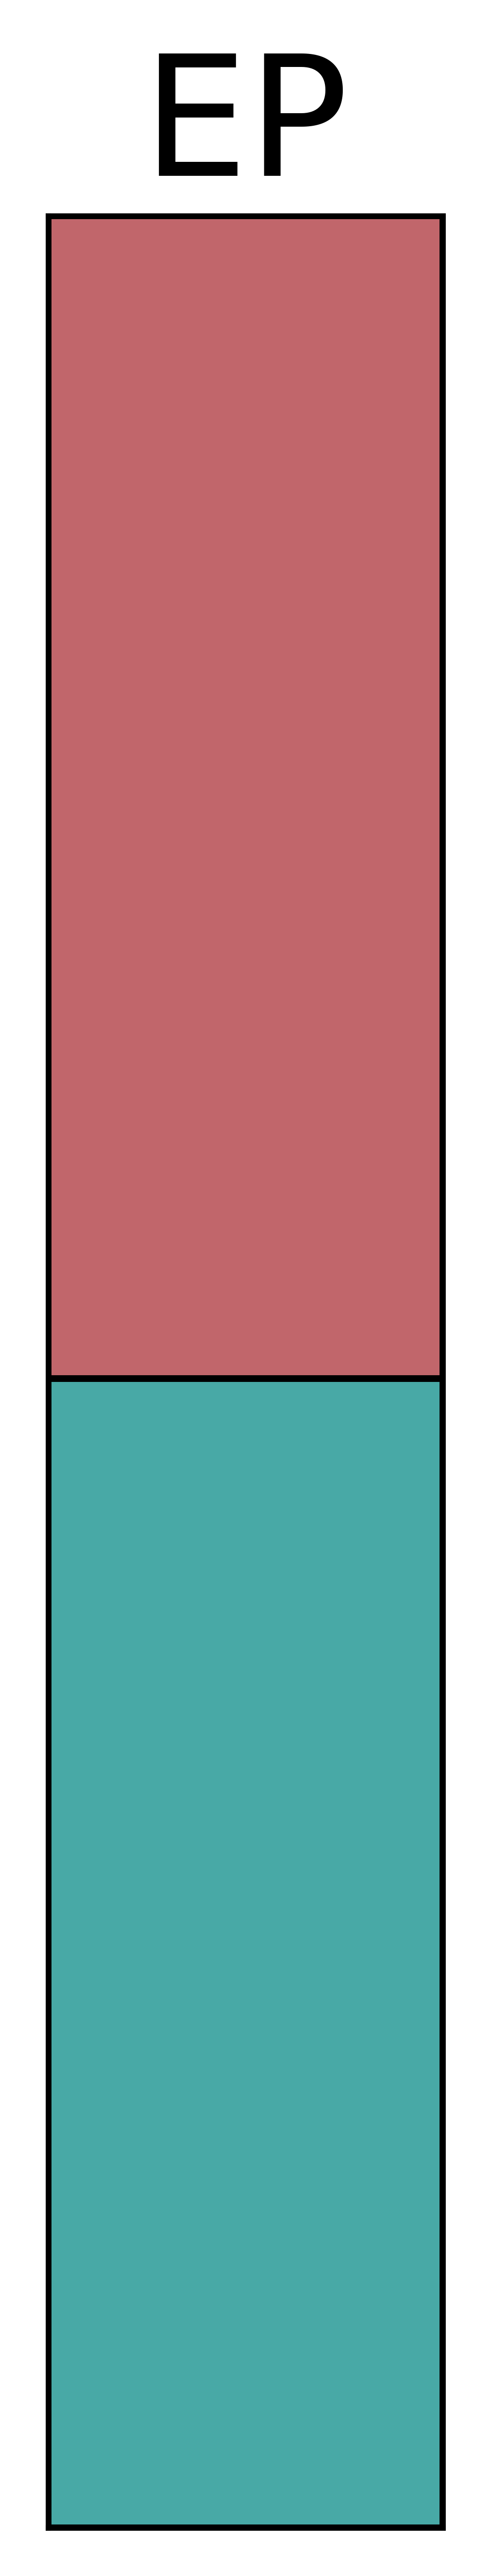

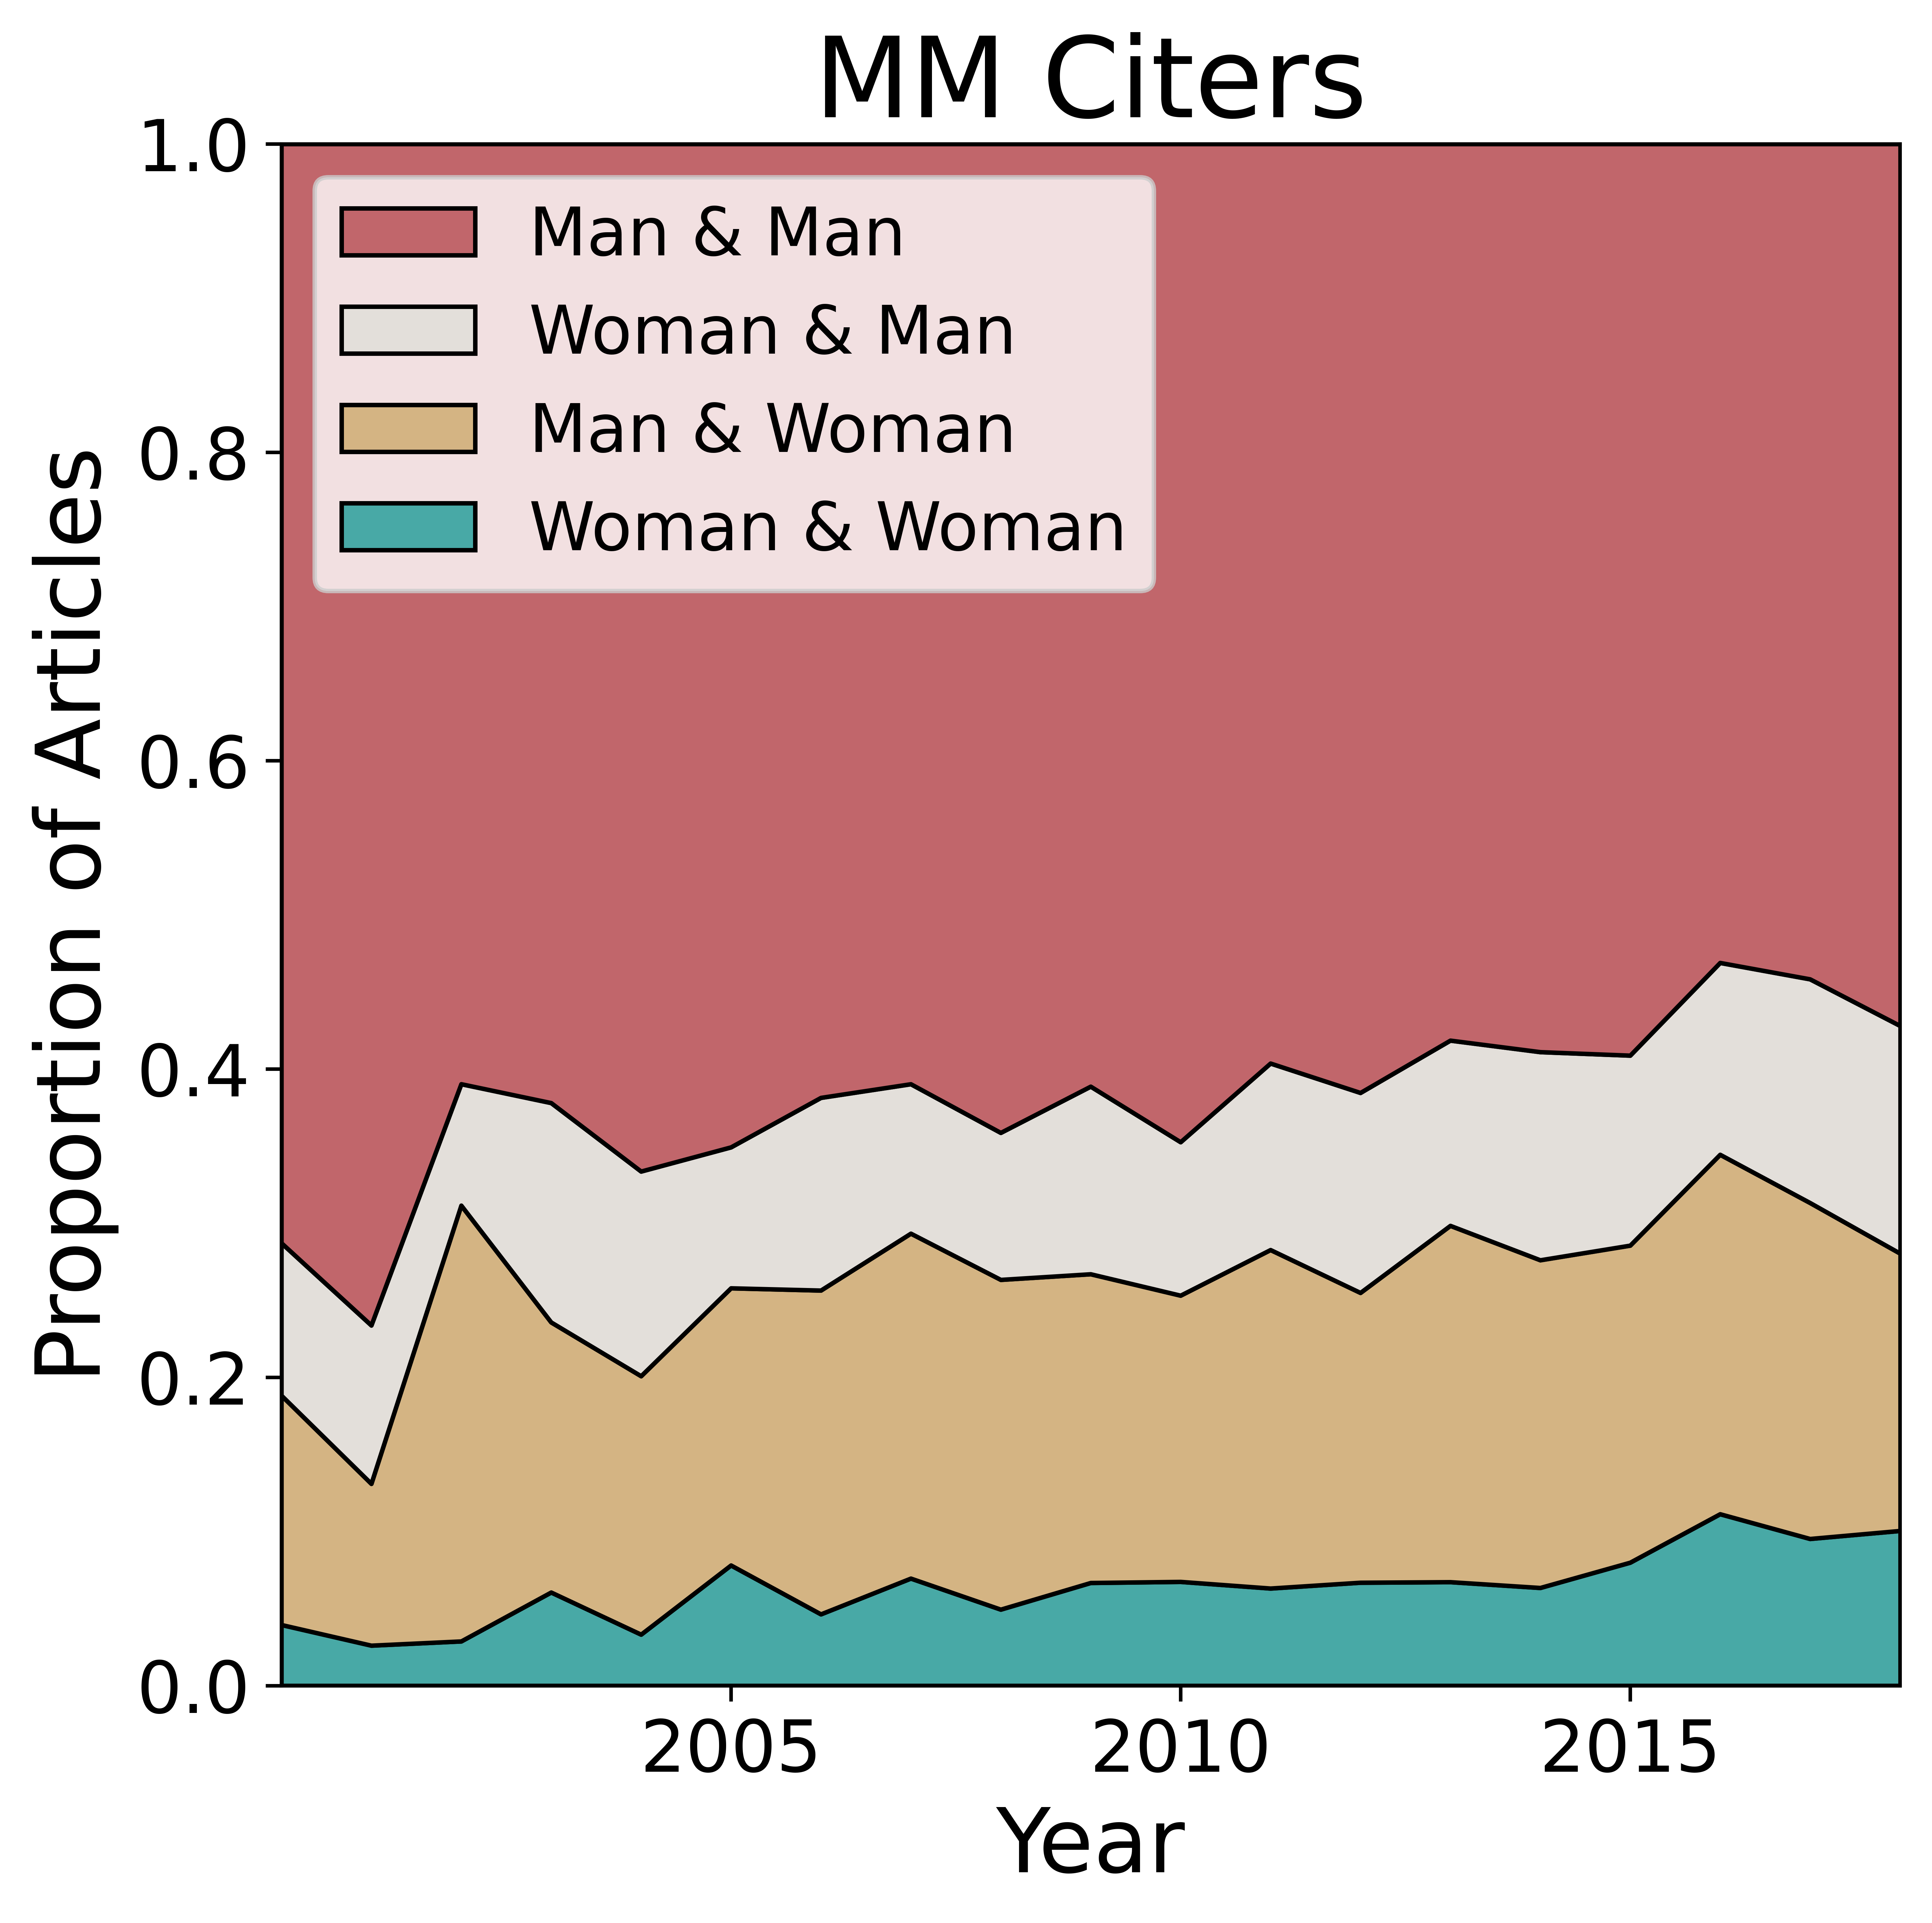

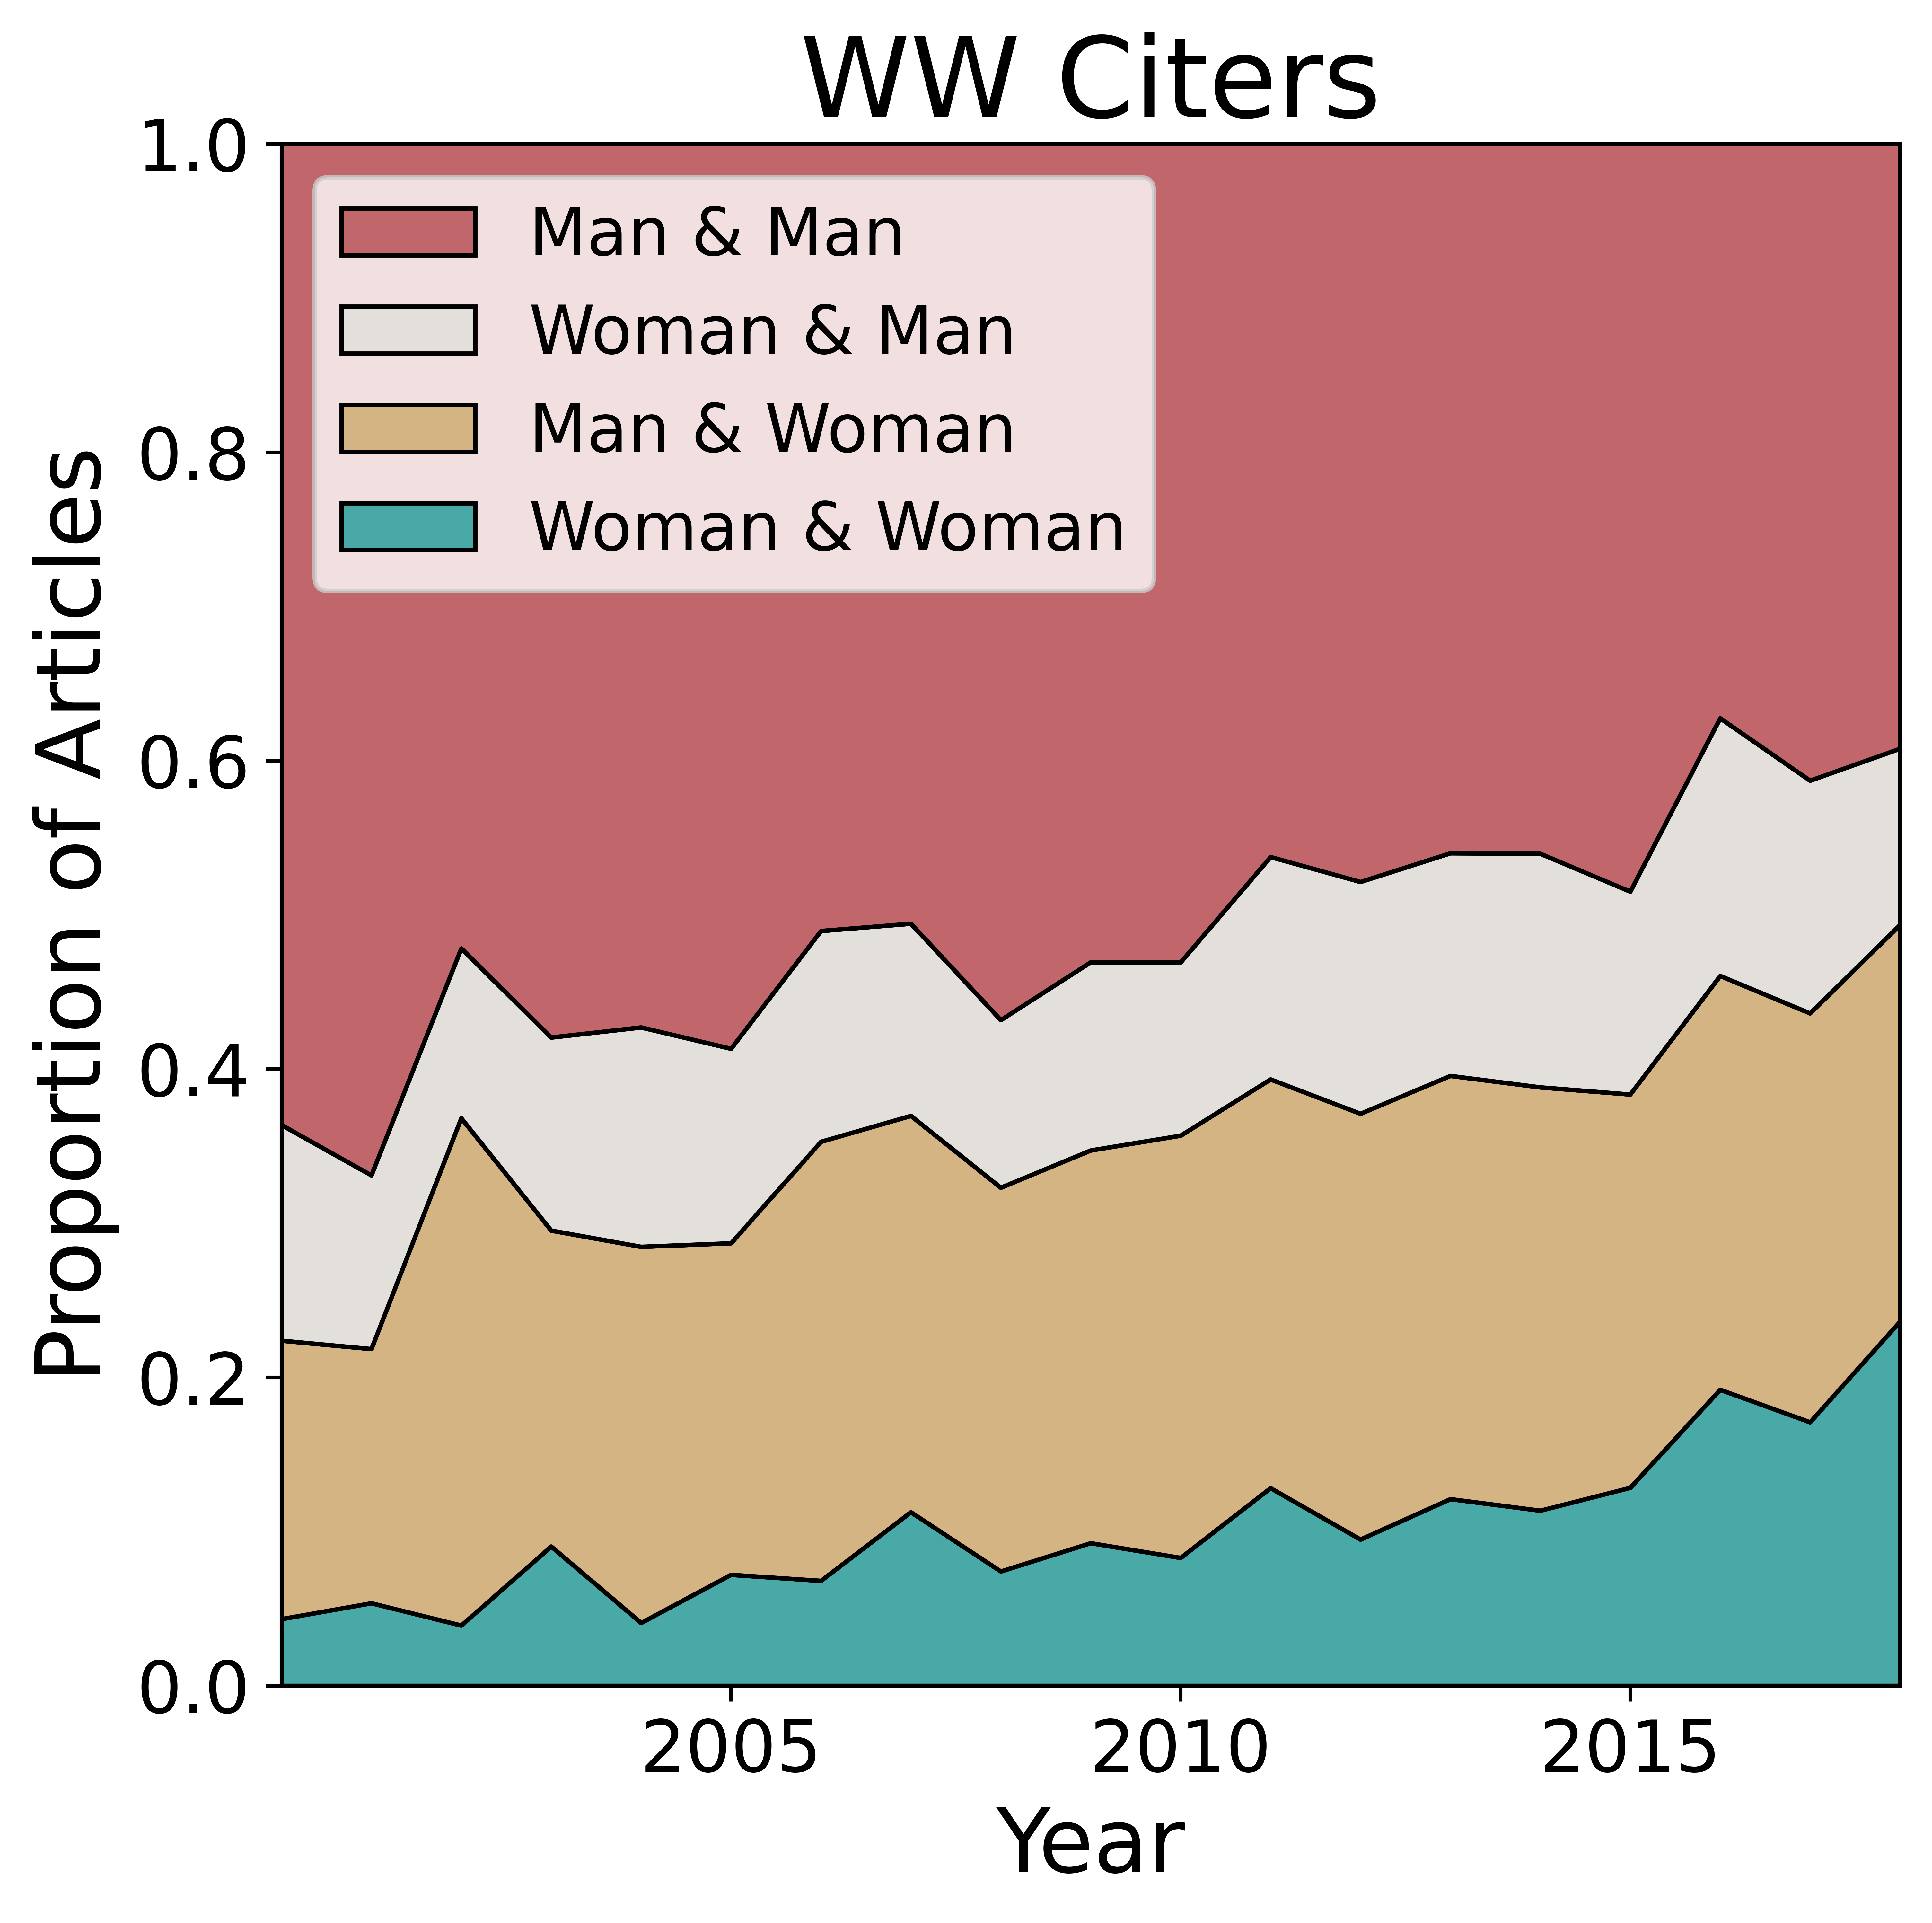

In [75]:
def gender_graphs(dataset,scope,author,model,analysis):
    ###### CONDITIONAL TO ENSURE WE RE NOT RUNNING ONE OF THE SUBANALYSIS
    if dataset!='Highlycited_75':
        # Reading in Dataframes for authorship
        df_yearly=pd.read_csv('Data/Fig_1/df_fig1_pairings_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')
        df_yearly_author=pd.read_csv('Data/Fig_1/df_fig1_authors_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')
        df_genders=pd.read_csv('Data/Fig_1/df_fig1_genders_'+dataset+'_'+model+'_'+scope+'_'+author+'.csv')
        genders=df_genders['Items'].to_list()

###################################### FIRST/LAST AUTHORSHIP FIGURE #########################################
        fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)

        ax.stackplot(df_yearly_author['Year'],  df_yearly_author['Woman'],  df_yearly_author["Man"],
                          labels=['Woman','Man'],
                          colors=['#48A9A6','#C1666B'],ec='black')

        ## AXIS PARAMETERS FOR GRAPH1
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
        ax.set_ylim(0,1)
        folder=dataset.title()
        ax.set_xlim(2000,2019)
        ax.set_xticks((2000,2005,2010,2015))
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xlabel('Year', fontsize=20,fontweight='roman')
        ax.set_ylabel('Proportion of Articles', fontsize=20,fontweight='roman')
        if author=='LA':
            ax.set_title('Senior Authors', fontsize=25)
        if author=='FA':
            ax.set_title('Lead Authors', fontsize=25)


        if analysis=='main':
            plt.savefig(str('make_figures/fig2_pt1.png'),dpi=100)
        else:
            plt.savefig(str('make_figures/fig2_pt1_'+analysis+'.png'),dpi=100)

###################################### AUTHORSHIP PAIRING FIGURE ############################################
        fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)
        ax.stackplot(df_yearly['Year'],  df_yearly['WW'],  df_yearly["MW"],  df_yearly["WM"],df_yearly["MM"],
                          labels=['Woman & Woman','Man & Woman','Woman & Man','Man & Man'],
                          colors=['#48A9A6','#D4B483','#E3DFDA','#C1666B'],ec='black')

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
        ax.set_xlim(min(df_yearly['Year']), max(df_yearly['Year']))
        ax.set_ylim(0,1)
        folder=dataset.title()

        ## AXIS PARAMETERS FOR GRAPH2
        ax.tick_params(axis='both', which='major', labelsize=15)


        ax.set_xlim(2000,2019)
        ax.set_ylim(0,1)
        ax.set_title('Author Pairings', fontsize=25)
        folder=dataset.title()

        ax.set_xlim(2000,2019)
        ax.set_xticks((2000,2005,2010,2015))
        ax.tick_params(axis='both', which='major', labelsize=16)

        ax.set_xlabel('Year', fontsize=20,fontweight='roman')
        ax.set_ylabel('Proportion of Articles', fontsize=20,fontweight='roman')
        if analysis=='main':
            plt.savefig(str('make_figures/fig2_pt2.png'),dpi=100)
        else:
            plt.savefig(str('make_figures/fig2_pt2_'+analysis+'.png'),dpi=100)
#################################### EXPECTED PAIRINGS GRAPHS ############################################# 
        fig,ax=plt.subplots(figsize=(1,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.97,bottom=0.12,top=0.92)

        [LA_women,LA_men,FA_women,FA_men,women,men]=genders
        WW_x=LA_women*FA_women
        WM_x=FA_women*LA_men
        MW_x=FA_men*LA_women
        MM_x=FA_men*LA_men
        df_yearly=pd.DataFrame(data=[[0,MM_x,WM_x,MW_x,WW_x],[1,MM_x,WM_x,MW_x,WW_x]], columns=['Year','MM','WM','MW','WW'])

        ax.stackplot(df_yearly['Year'],  df_yearly['WW'],  df_yearly["MW"],  df_yearly["WM"],df_yearly["MM"],
                          labels=['Woman & Woman','Man & Woman','Woman & Man','Man & Man'],
                          colors=['#48A9A6','#D4B483','#E3DFDA','#C1666B'],ec='black')


        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,1)
        ax.set_title('EF', fontsize=25)
        if analysis=='main':
            plt.savefig(str('make_figures/fig_2_pt2_expected.png'),dpi=100)
        else:
            plt.savefig(str('make_figures/fig_2_pt2_expected'+analysis+'.png'),dpi=100)

###################################### EXPECTED AUTHORSHIP GRAPHS ############################################
    fig,ax=plt.subplots(figsize=(1,6),dpi=1000)
    plt.subplots_adjust(left=0.15,right=.97,bottom=0.12,top=0.92)

    # GENDER POPULATION DATA COMES FROM: https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS

    df_gender_expected=pd.DataFrame(data=[[0,.497,0.503],[1,.497,0.503]], columns=['Year','Woman','Man'])

    ax.stackplot(df_gender_expected['Year'], df_gender_expected['Woman'],df_gender_expected["Man"],
                      labels=['Woman','Man'],
                      colors=['#48A9A6','#C1666B'],ec='black')

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.set_title('EP', fontsize=25)
    plt.savefig(str('make_figures/fig_2_pt1_expected.png'),dpi=100)
#################################### CITATION PRACTICES GRAPHS ##############################################    
    df_MM=pd.read_csv('Data/Fig_2/df_fig2_MM_'+dataset+'_'+model+'_'+scope+'.csv')
    df_WW=pd.read_csv('Data/Fig_2/df_fig2_WW_'+dataset+'_'+model+'_'+scope+'.csv')

    dfs=[df_MM,df_WW]
    for x in range(0,2):
        fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)
        df_yearly=dfs[x]


        ax.stackplot(df_yearly['Year'],  df_yearly['WW'],  df_yearly["WM"],  df_yearly["MW"],df_yearly["MM"],
                      labels=['Woman & Woman','Man & Woman','Woman & Man','Man & Man'],
                      colors=['#48A9A6','#D4B483','#E3DFDA','#C1666B'],ec='black')




        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xlabel('Year', fontsize=20)
        ax.set_ylabel('Proportion of Articles', fontsize=20)
        ax.set_ylim(0,1)
        ax.set_xlim(2000,2018)
        ax.set_xticks((2005,2010,2015))
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
        if analysis=='main':
            if x==1:
                ax.set_title('WW Citers', fontsize=25)
                plt.savefig(str('make_figures/fig2_WW.png'),dpi=100)

            else:
                ax.set_title('MM Citers', fontsize=25)
                plt.savefig(str('make_figures/fig2_MM.png'),dpi=100)
        else:
            if x==1:
                ax.set_title('WW Citers', fontsize=25)
                plt.savefig(str('make_figures/fig2_WW_'+analysis+'.png'),dpi=100)

            else:
                ax.set_title('MM Citers', fontsize=25)
                plt.savefig(str('make_figures/fig2_MM_'+analysis+'.png'),dpi=100)



gender_graphs('Highly Cited','World','LA','Genderize','main')
#gender_graphs('Highly Cited','Global North','LA','Genderize','GN')
# gender_graphs('Highly Cited','World','FA','Genderize','FA')
# gender_graphs('Highly Cited','World','LA','Namsor','namsor')
# gender_graphs('Books','World','LA','Genderize','books')
# gender_graphs('Highlycited_75','World','LA','Genderize','con_75')
# gender_graphs('Highly Cited_60','World','LA','Genderize','thresh_60')
# gender_graphs('Highly Cited_80','World','LA','Genderize','thresh_80')


## Race Graphs

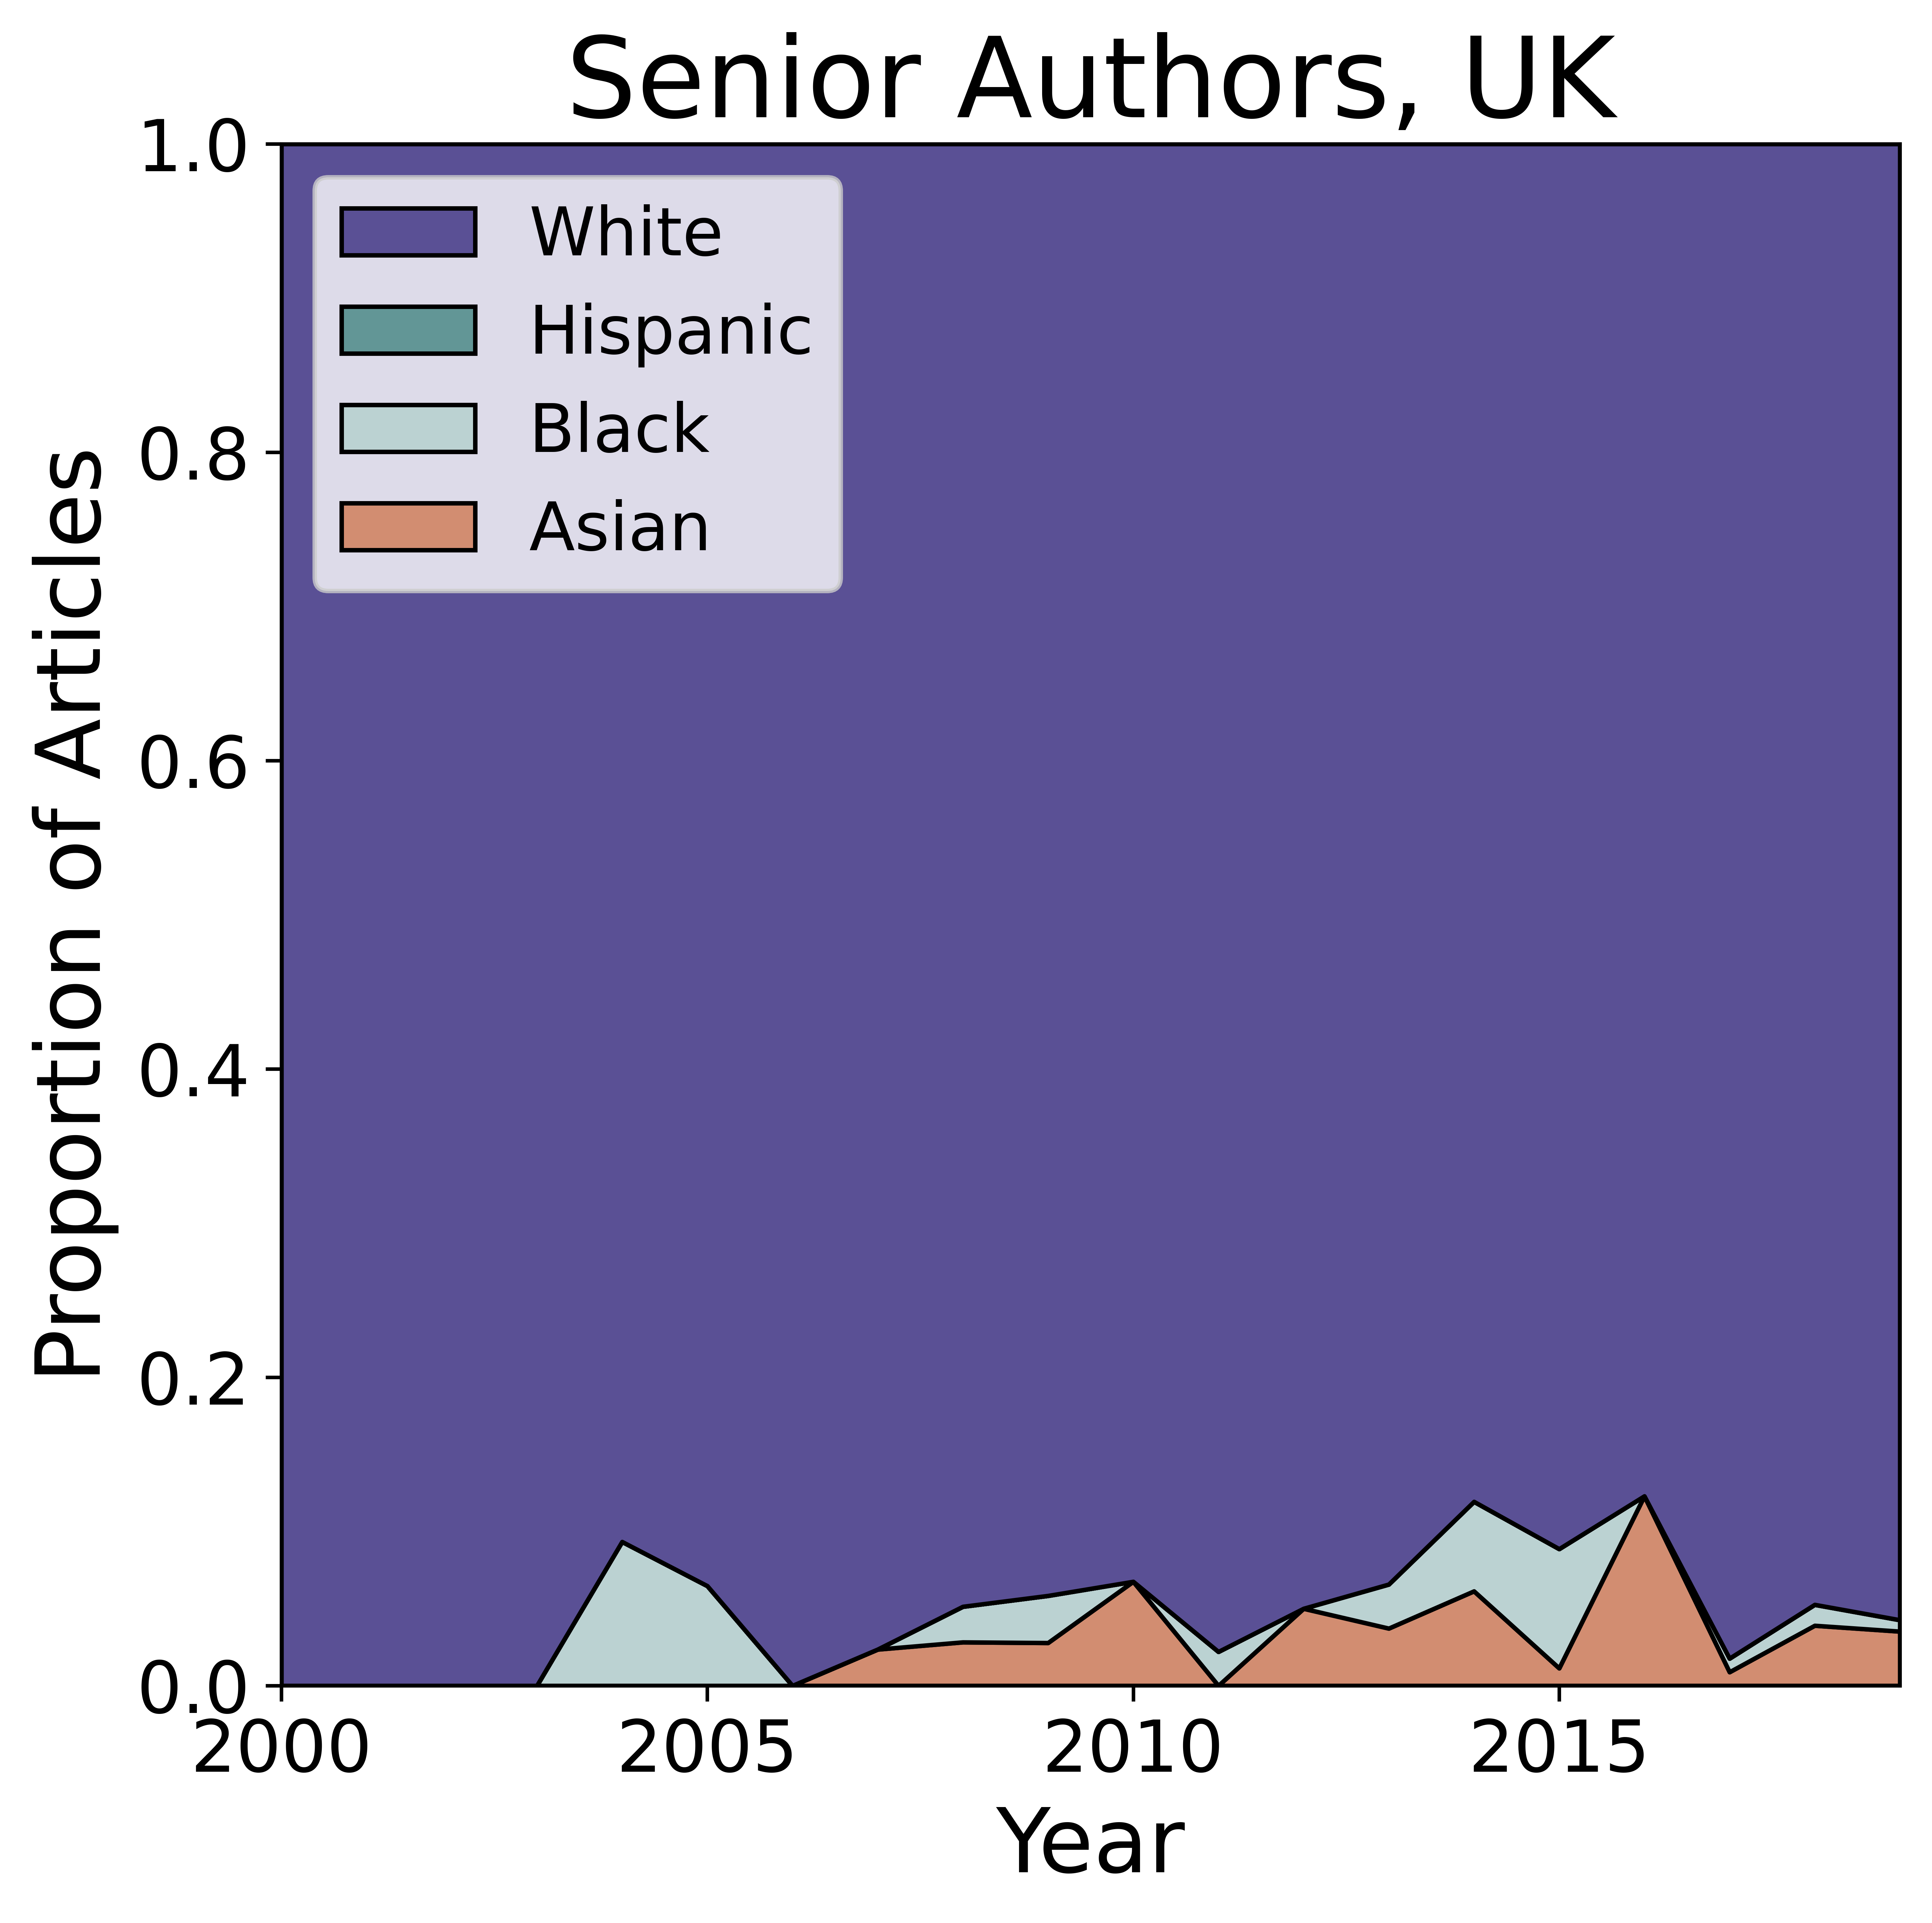

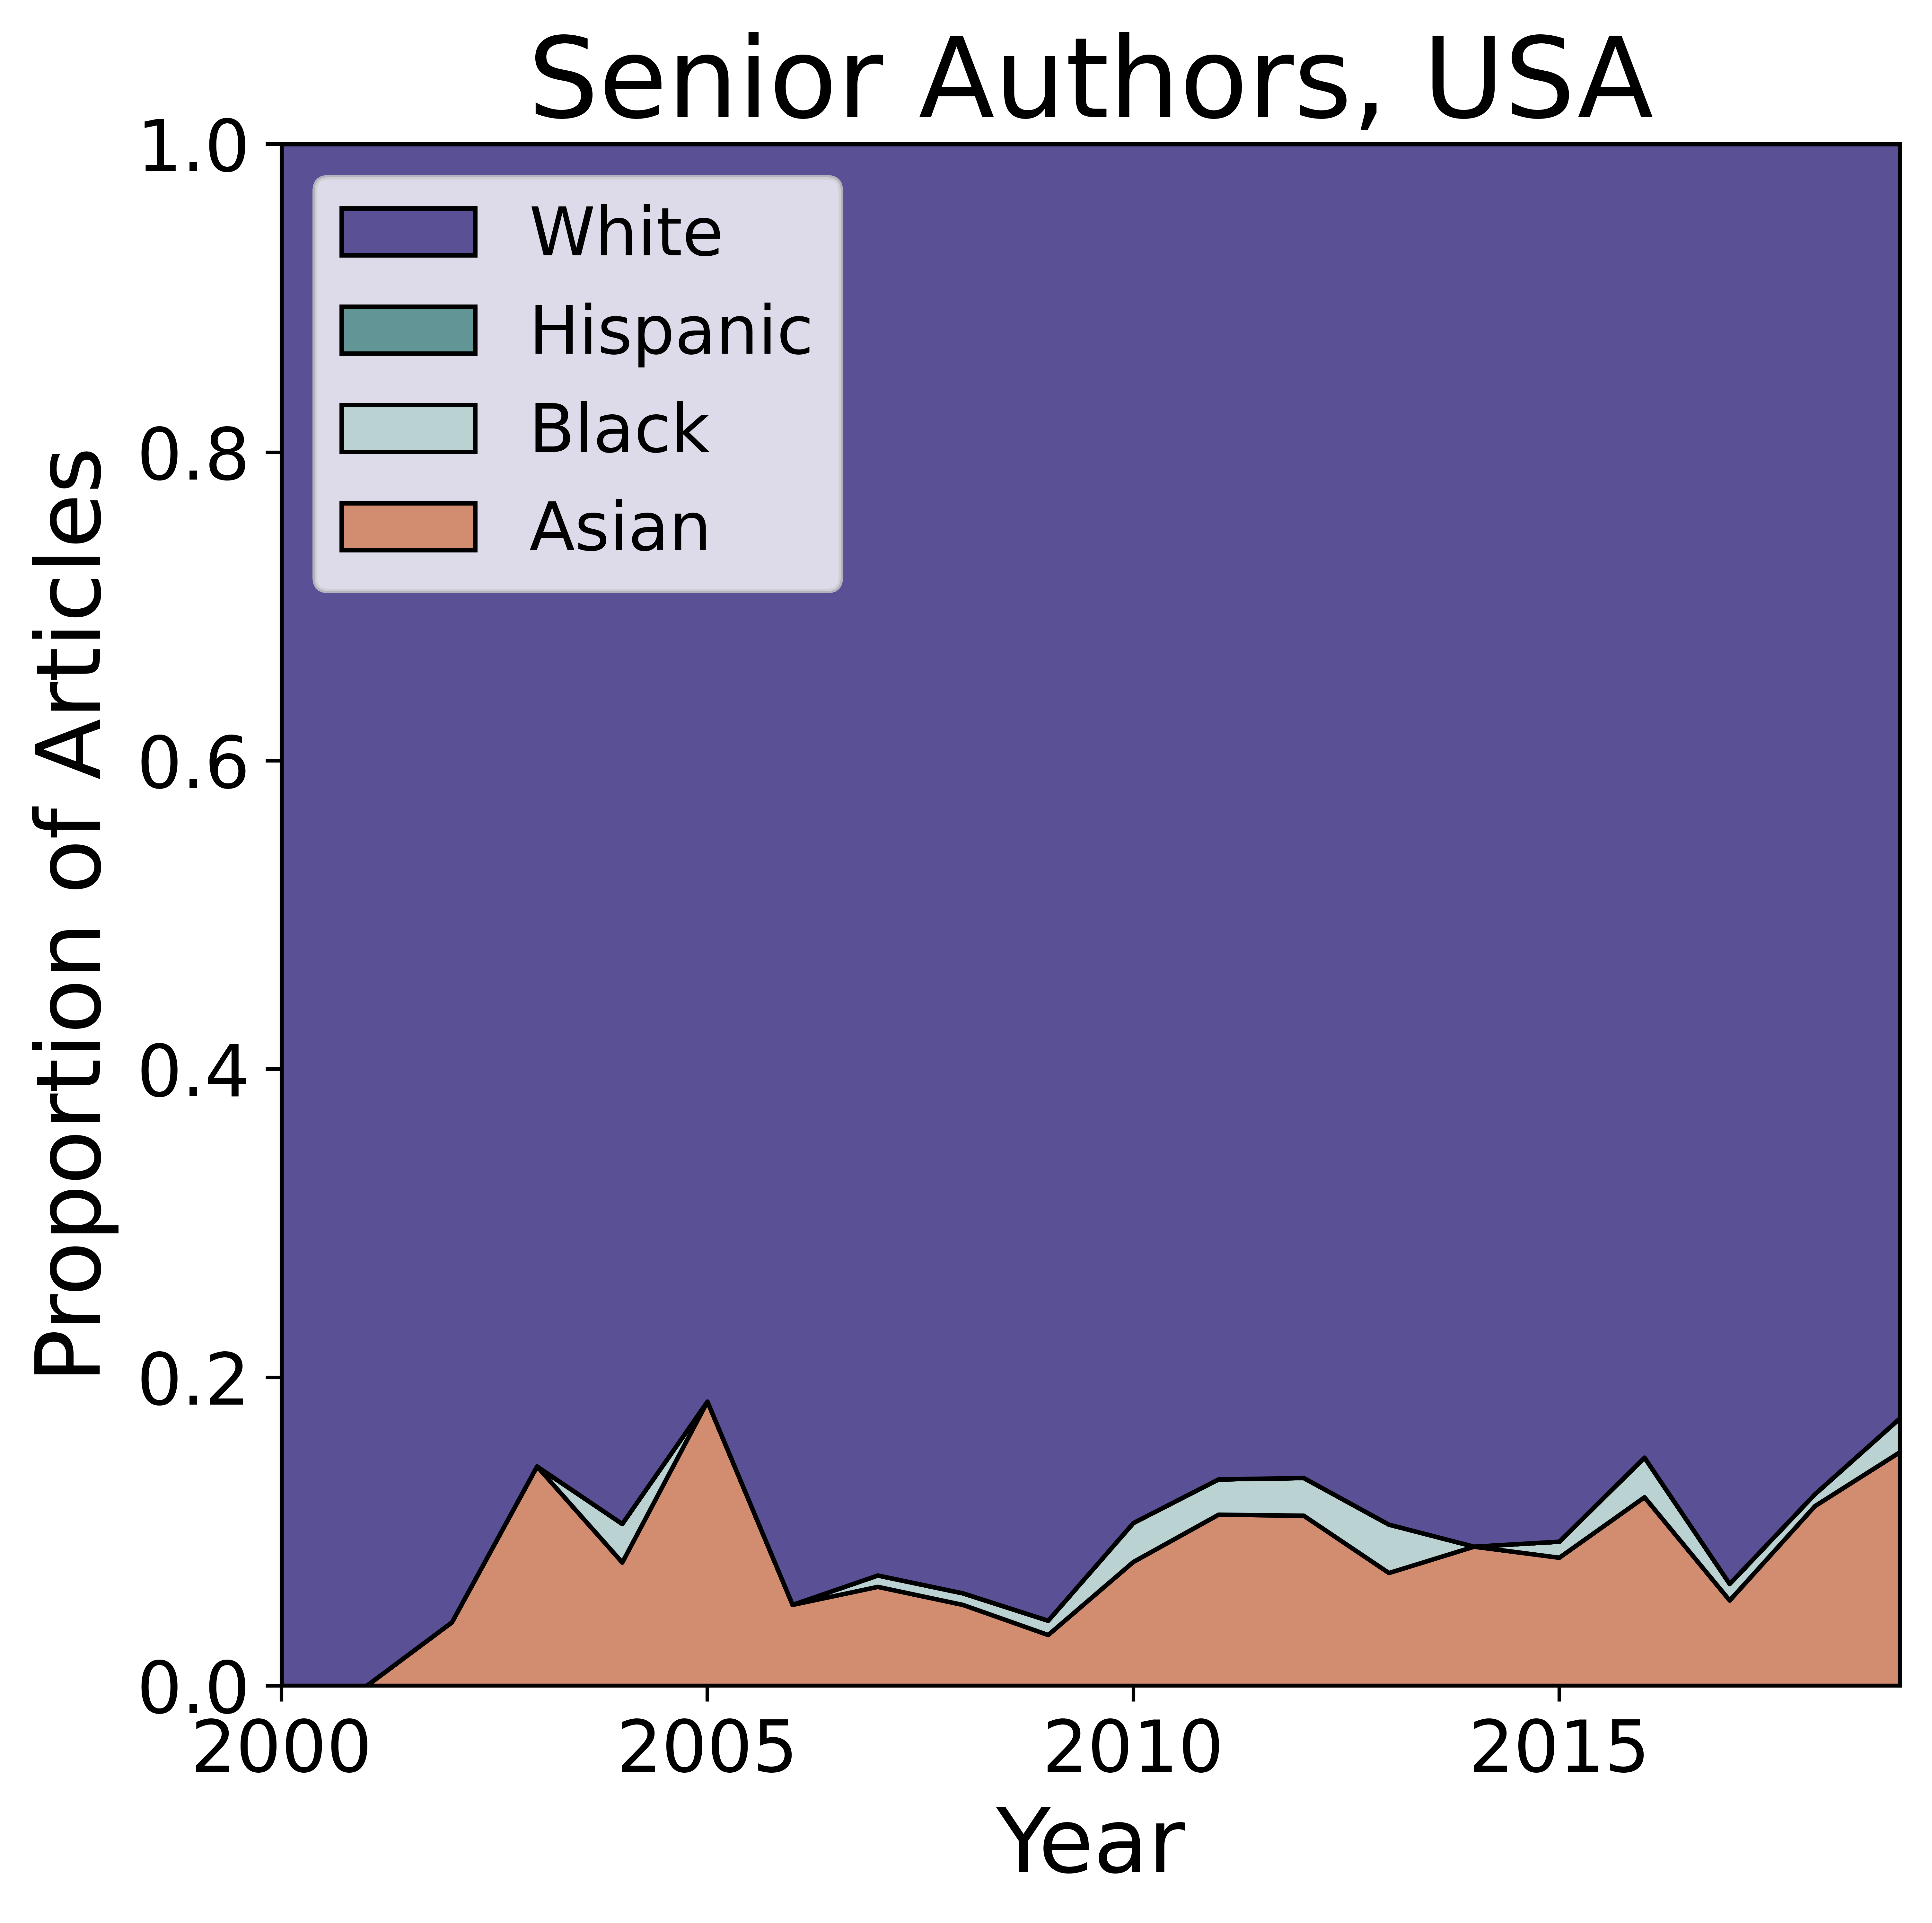

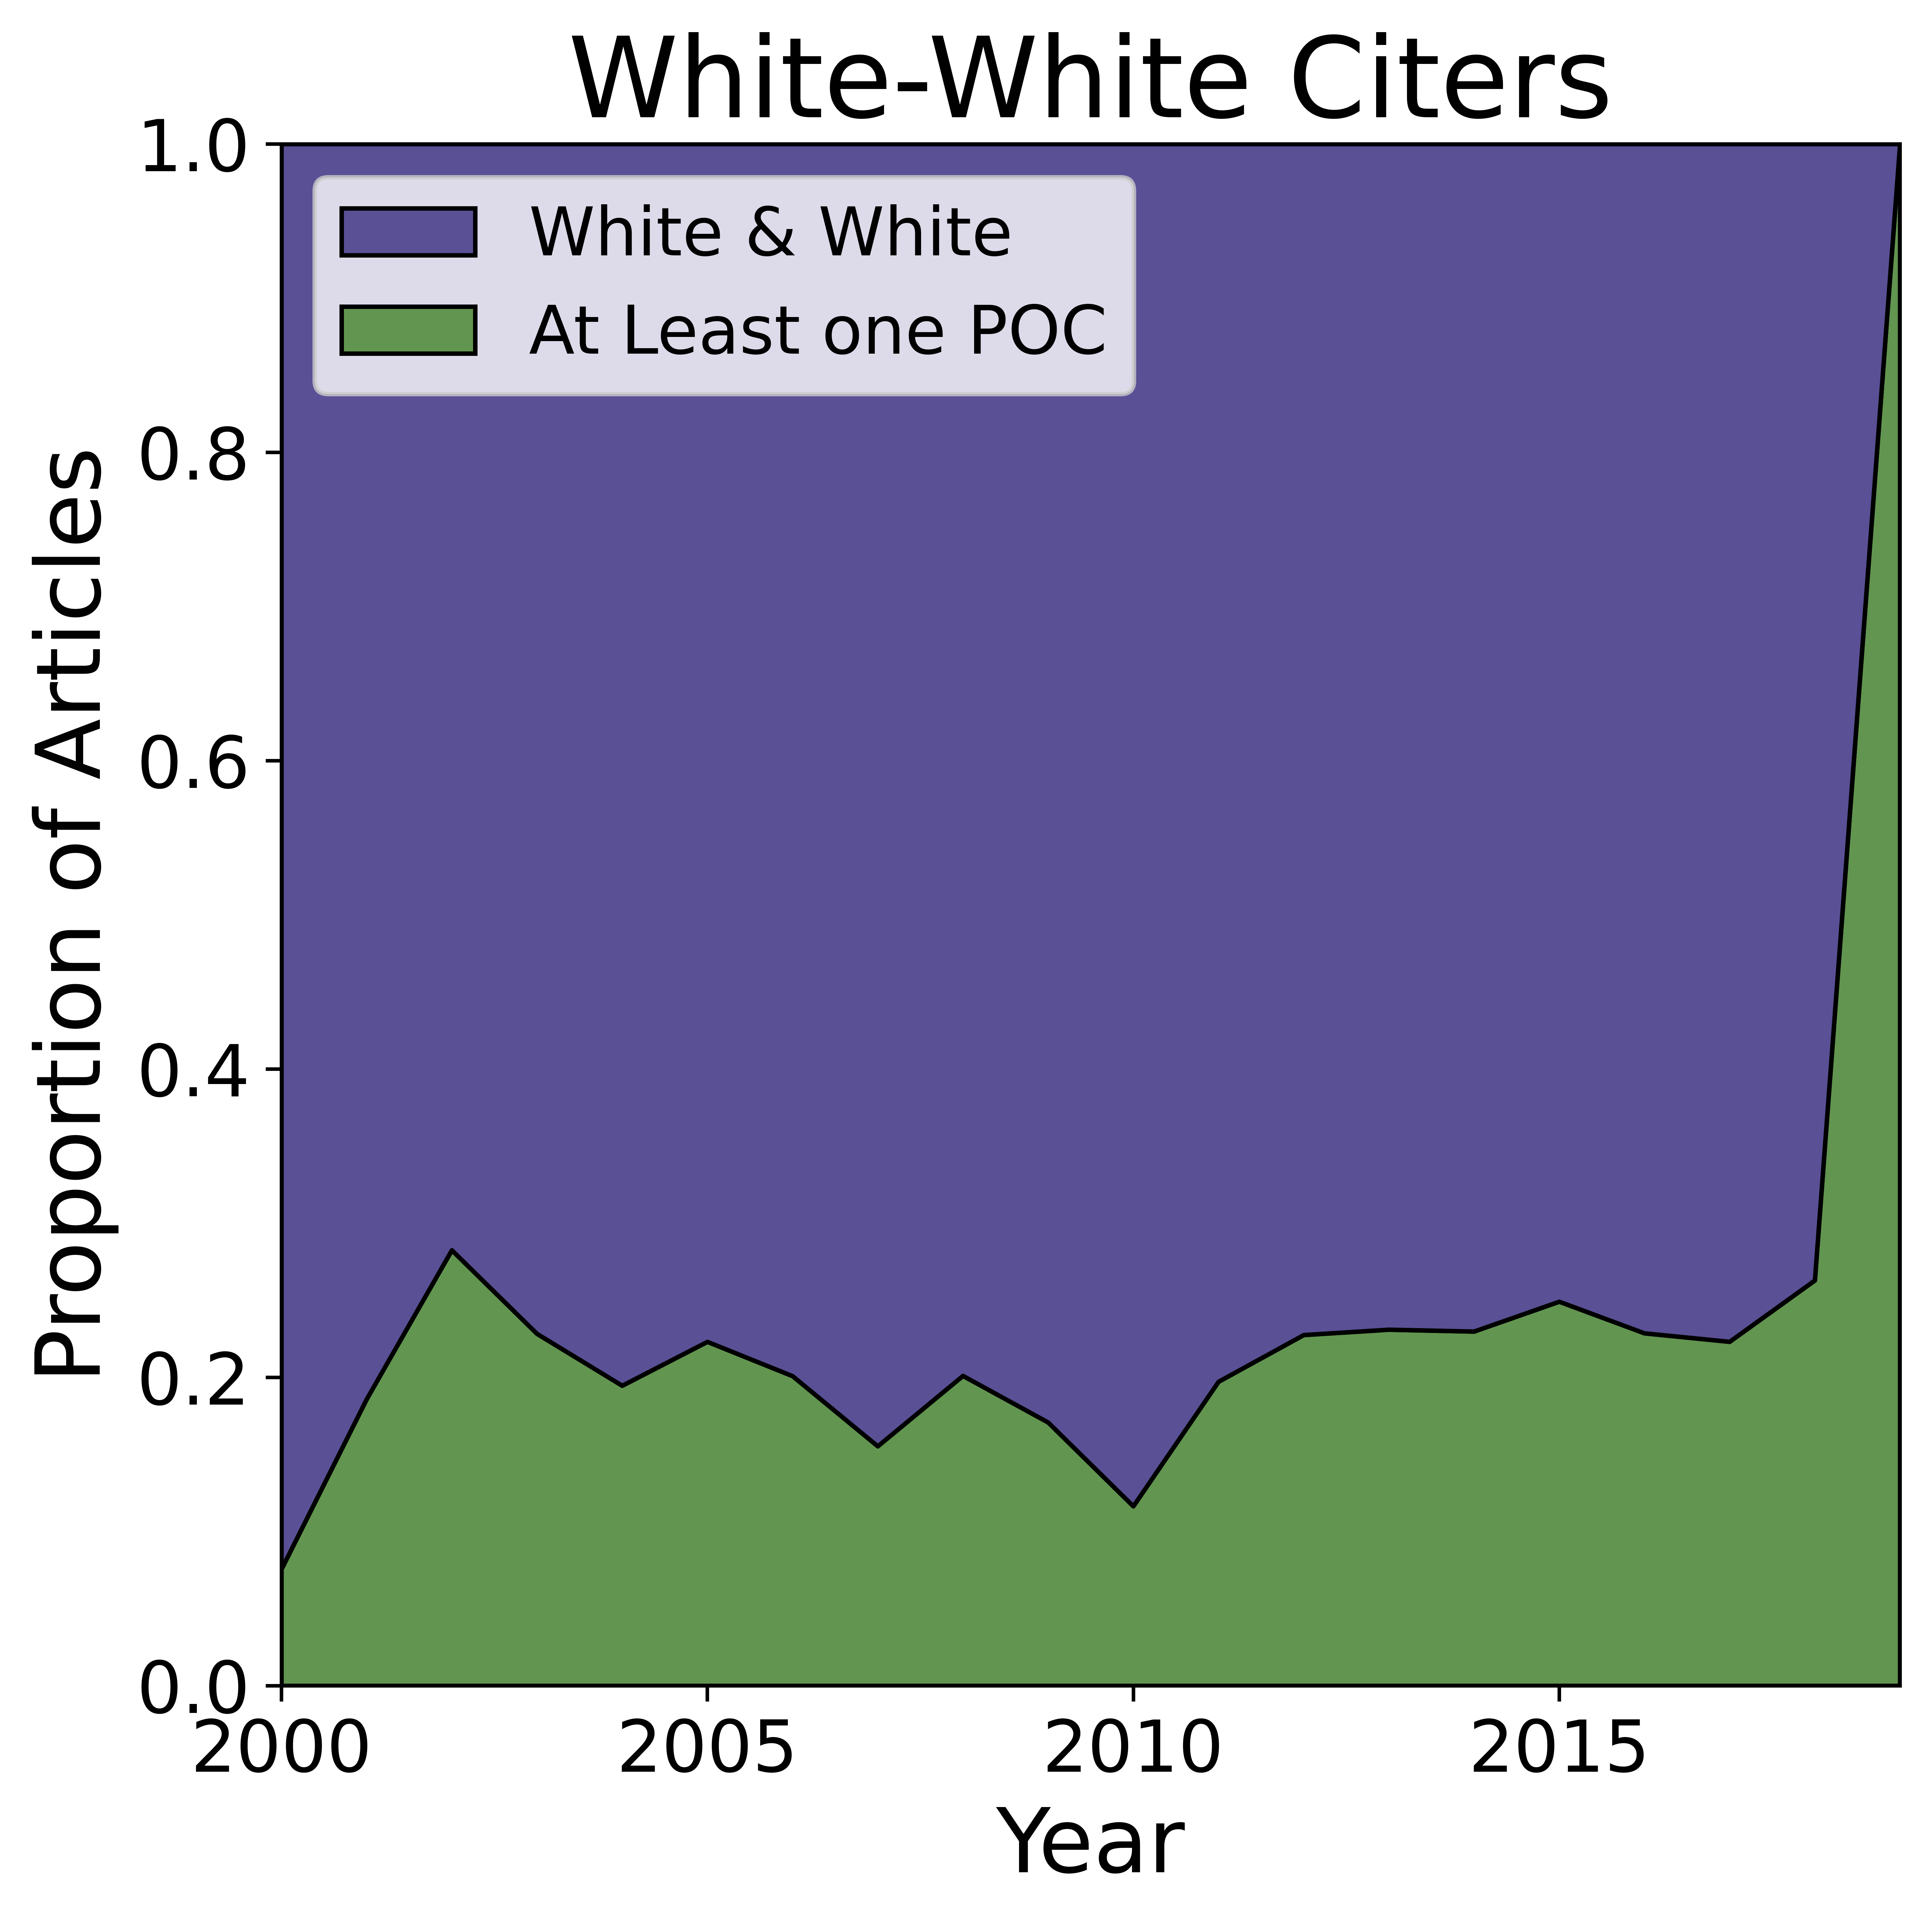

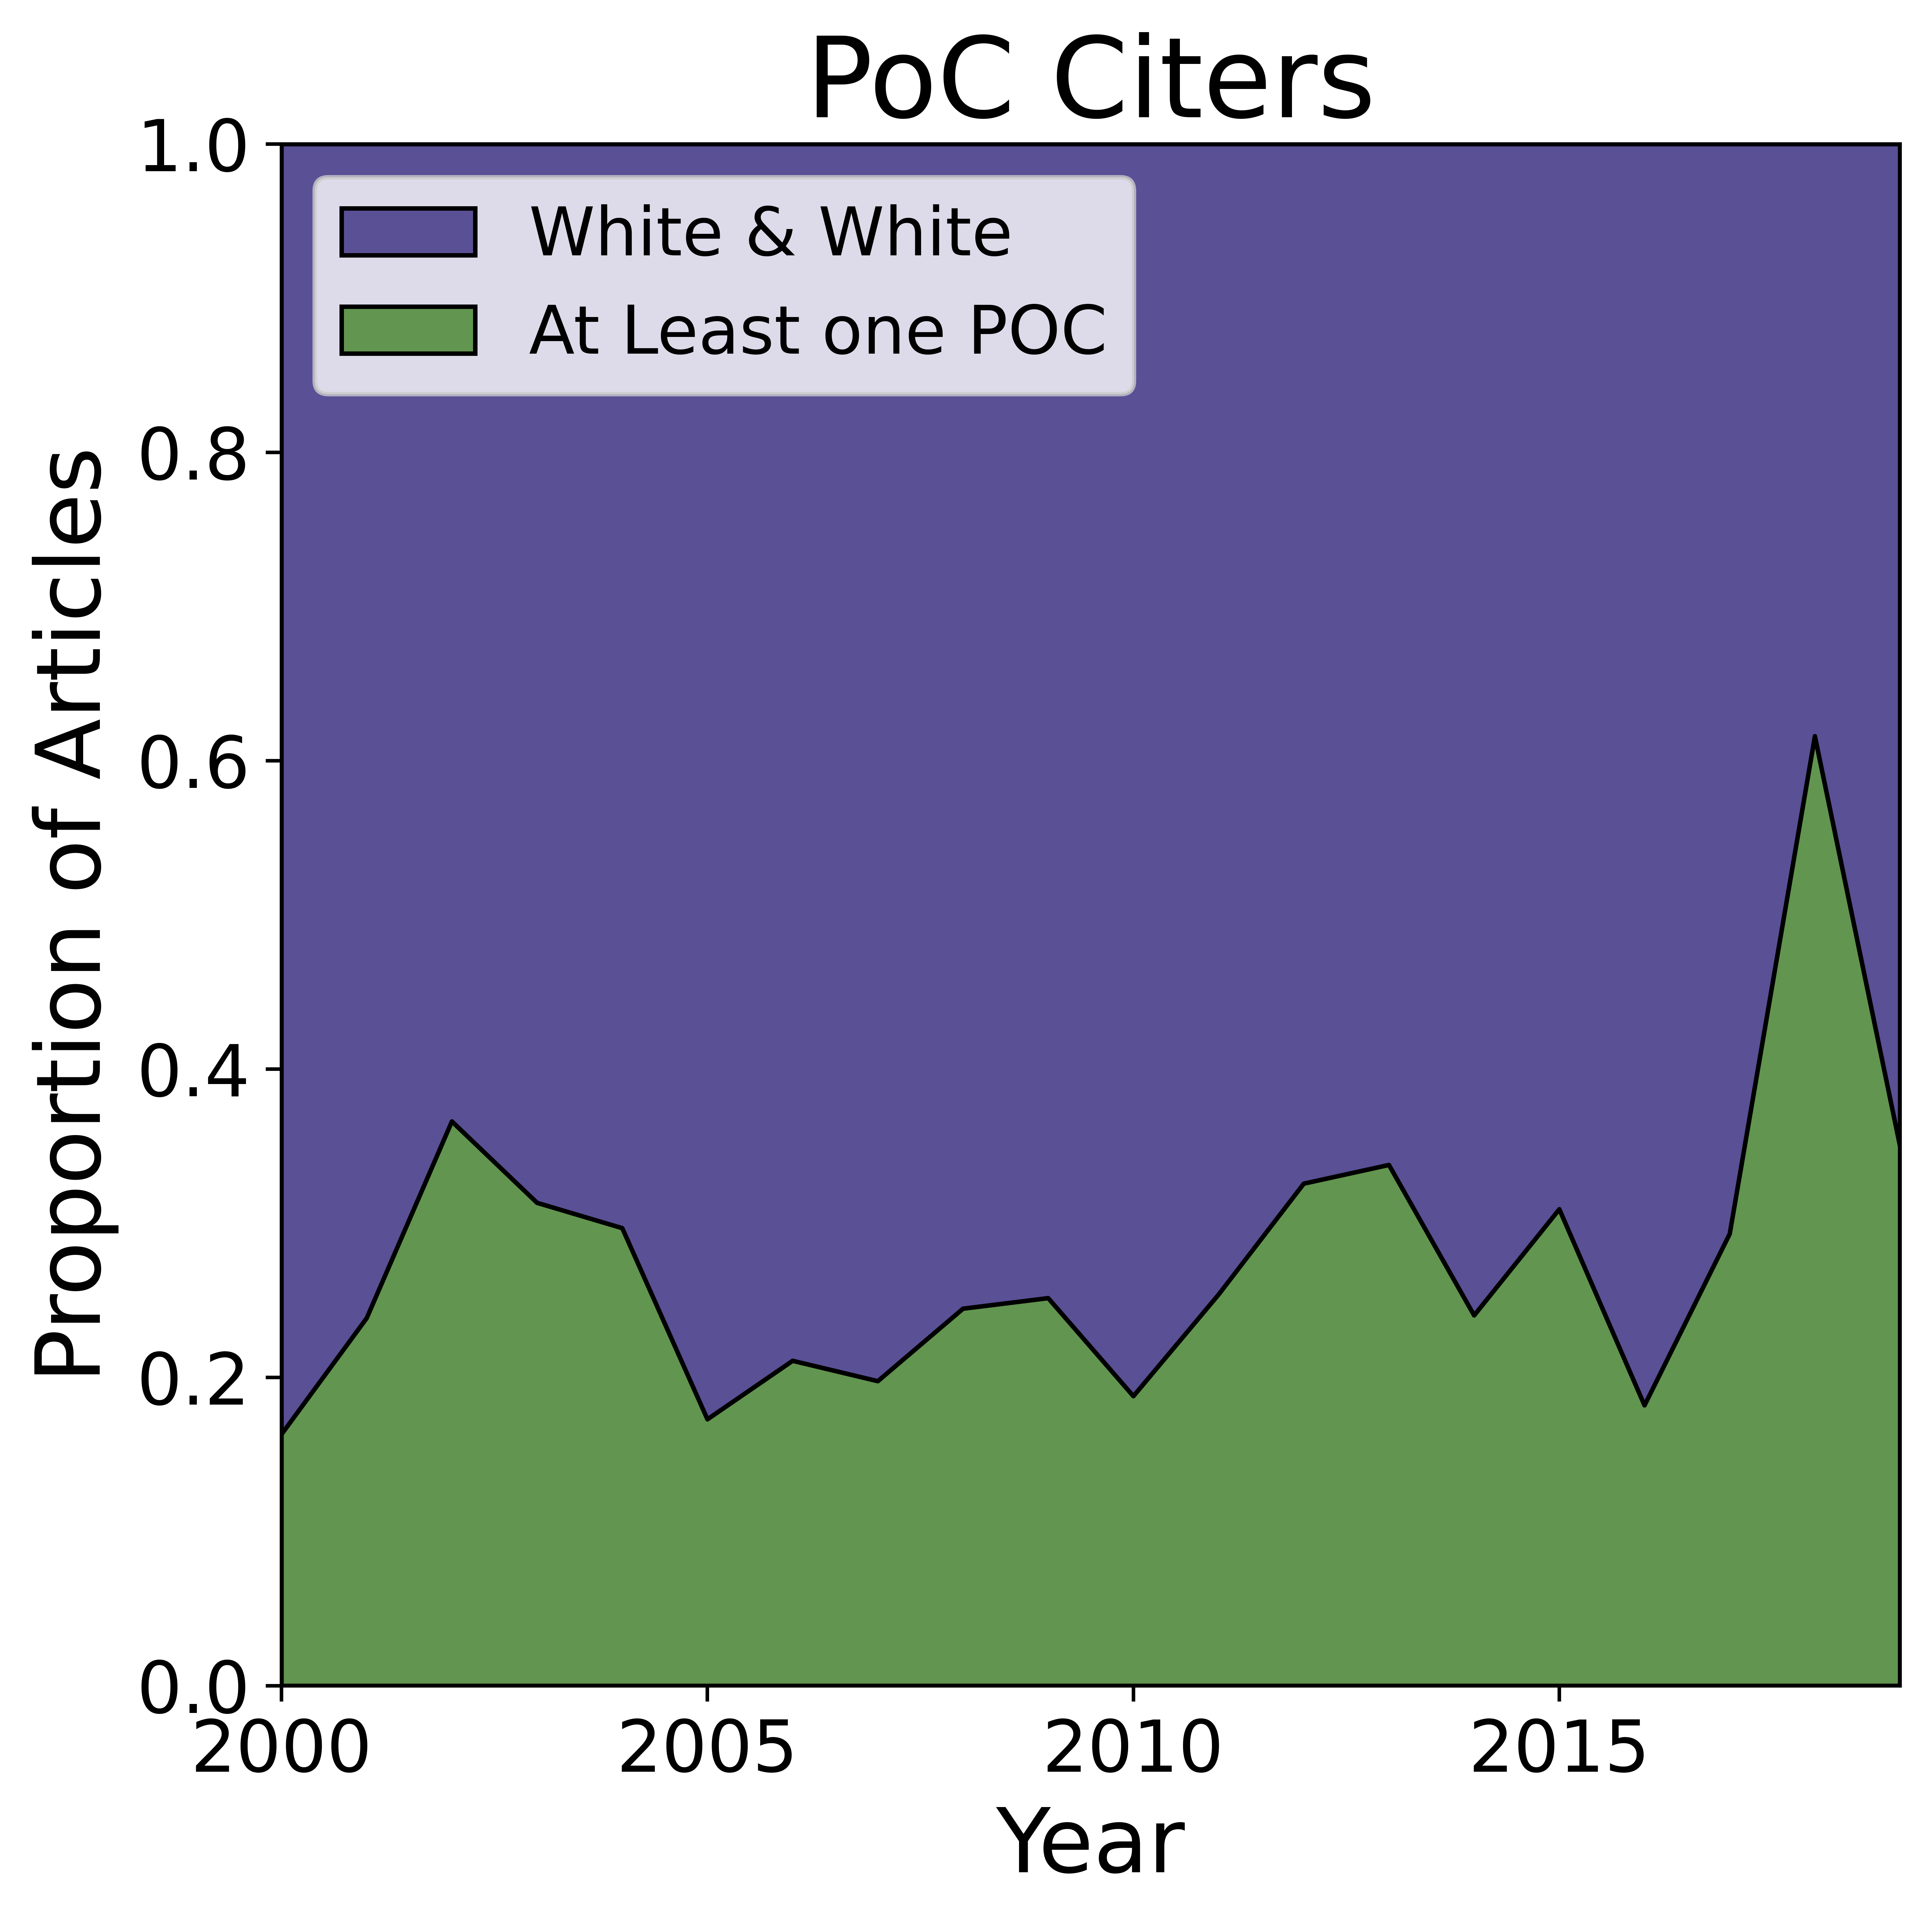

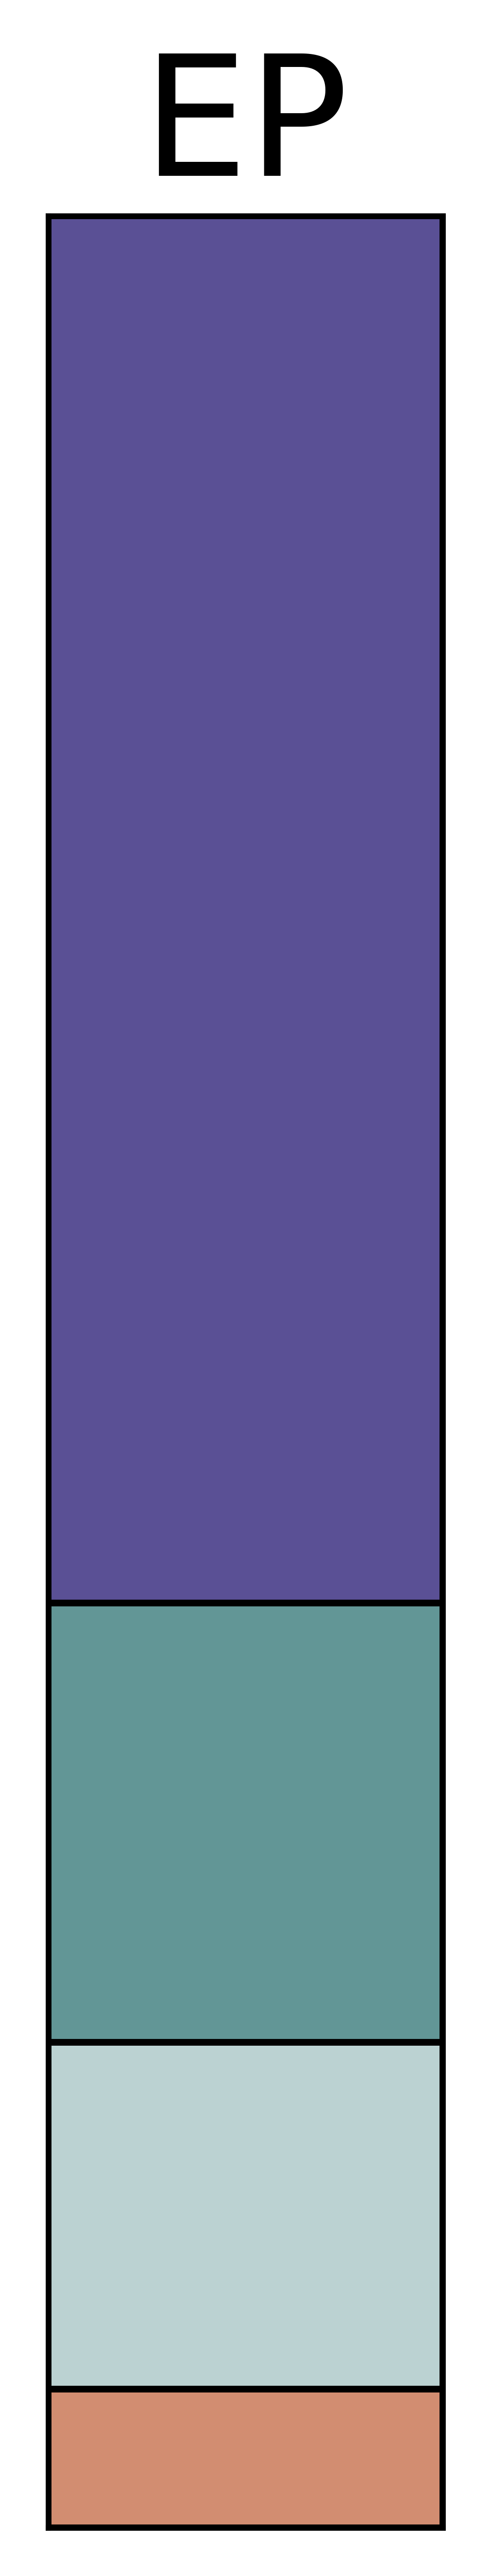

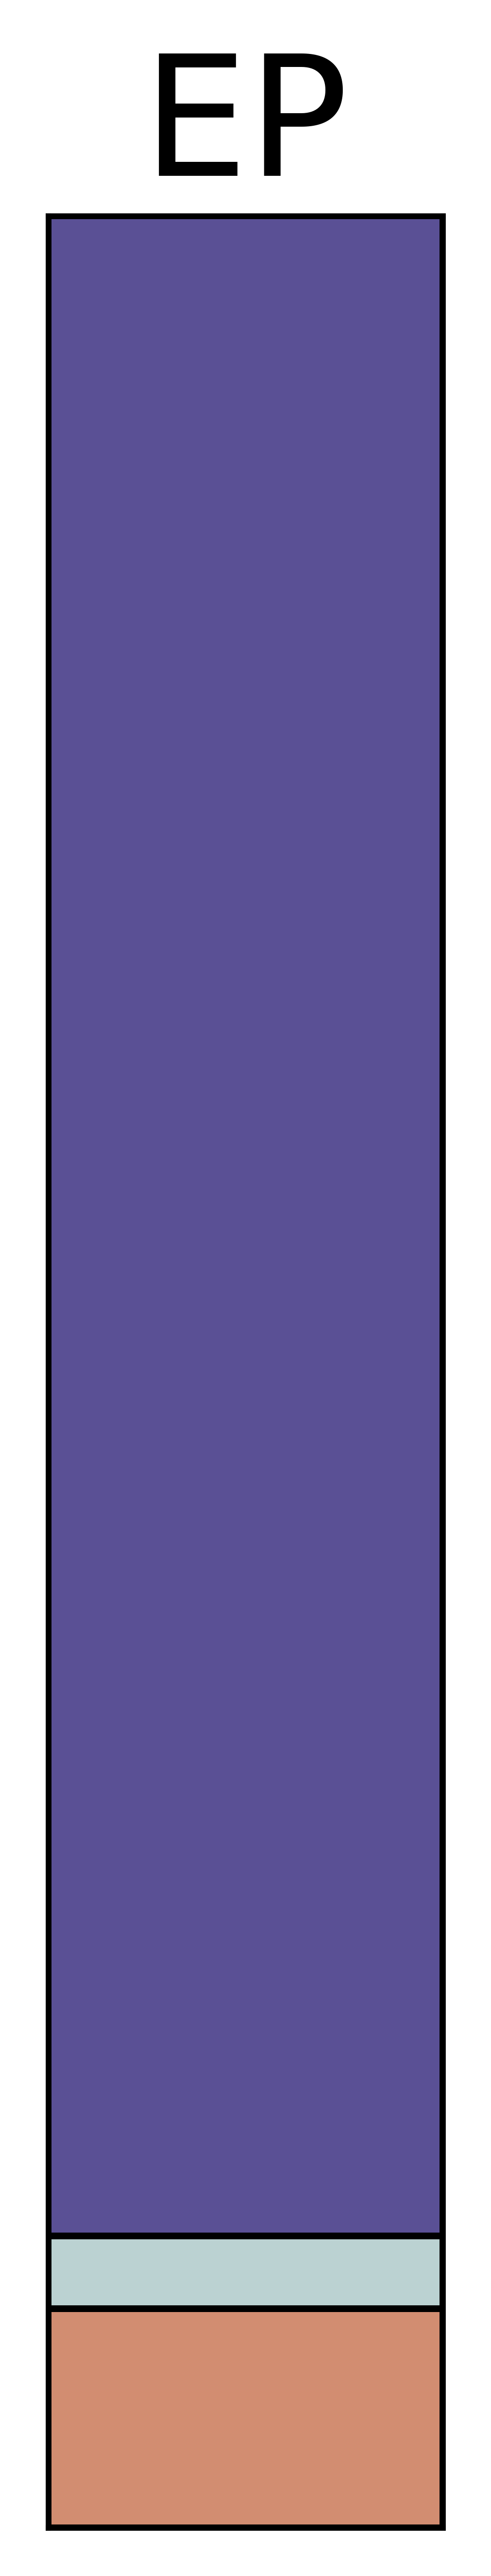

In [71]:
def race_graphs(dataset,scope1,scope2,author,model,analysis):
    
    df_WW=pd.read_csv('Data/Fig_4/df_fig4_WW_'+dataset+'_'+model+'_'+scope1+'_'+scope2+'.csv')
    df_PoC=pd.read_csv('Data/Fig_4/df_fig4_PoC_'+dataset+'_'+model+'_'+scope1+'_'+scope2+'.csv')
    
    ###### CONDITIONAL TO ENSURE WE RE NOT RUNNING ONE OF SUBANALYSIS
    if dataset!='Highly Cited_75':
        df_UK=pd.read_csv('Data/Fig_3/df_fig3_authors_'+dataset+'_'+model+'_UK_'+author+'.csv')
        df_USA=pd.read_csv('Data/Fig_3/df_fig3_authors_'+dataset+'_'+model+'_USA_'+author+'.csv')
        
################################# GRAPHING AUTHORSHIP IN UK ##############################################
        fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)

        ax.stackplot(df_UK['Year'],  df_UK['A'], df_UK['B'],
                      df_UK['H'], df_UK['W'],
                          labels=['Asian','Black','Hispanic','White'],
                          colors=['#d28d71','#bbd2d2','#629696','#5a5095'],ec='black')

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
        ax.set_ylim(0,1)
        folder=dataset.title()
        ax.set_xlim(2000,2019)
        ax.set_xticks((2000,2005,2010,2015))
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xlabel('Year', fontsize=20,fontweight='roman')
        ax.set_ylabel('Proportion of Articles', fontsize=20,fontweight='roman')
        if author=='LA':
            ax.set_title('Senior Authors, UK', fontsize=25)
        if author=='FA':
            ax.set_title('Lead Authors, UK', fontsize=25)


        if analysis=='main':
            plt.savefig(str('make_figures/fig3_pt1_UK.png'),dpi=100)
        else: 
            plt.savefig(str("make_figures/fig3_pt1_UK_"+analysis+".png"))
################################# GRAPHING AUTHORSHIP IN US ##############################################
        fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)
        ax.stackplot(df_USA['Year'],  df_USA['A'], df_USA['B'],df_USA['H'], df_USA['W'],
                          labels=['Asian','Black','Hispanic','White'],
                          colors=['#d28d71','#bbd2d2','#629696','#5a5095'],ec='black')

        ax.set_ylim(0,1)
        ax.set_xlim(2000,2019)
        ax.set_xticks((2000,2005,2010,2015))
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xlabel('Year', fontsize=20)
        ax.set_ylabel('Proportion of Articles', fontsize=20)
        if author=='LA':
            ax.set_title('Senior Authors, USA', fontsize=25)
        if author=='FA':
            ax.set_title('Lead Authors, USA', fontsize=25)

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
        if analysis=='main':
            plt.savefig(str('make_figures/fig3_pt1_USA.png'),dpi=100)
        else:
            plt.savefig("make_figures/fig3_pt1_USA_"+analysis+".png")

################################# GRAPHING CITATION OF WW ARTICLES ############################################## 
    
    fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
    plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)
    ax.stackplot(df_WW['Year'],  df_WW['ANY_POC'],df_WW["WW"],
                      labels=['At Least one POC','White & White'],
                      colors=['#629550','#5a5095'],ec='black')



    ax.set_title('White-White Citers', fontsize=25)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Proportion of Articles', fontsize=20)
    ax.set_ylim(0,1)
    ax.set_xlim(2000,2019)
    ax.set_xticks((2000,2005,2010,2015))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)


    
    
    if analysis=='main':
        plt.savefig(str('make_figures/fig3_pt3_WW.png'),dpi=100)
    else:
        plt.savefig("makes_figures/fig3_pt3_WW_"+analysis+".png")
    
    
################################# GRAPHING CITATION OF PoC ARTICLES ############################################## 
 
    fig,ax=plt.subplots(figsize=(6,6),dpi=1000)
    plt.subplots_adjust(left=0.15,right=.99,bottom=0.12,top=0.92)
    ax.stackplot(df_PoC['Year'],  df_PoC['ANY_POC'],df_PoC["WW"],
                      labels=['At Least one POC','White & White'],
                      colors=['#629550','#5a5095'],ec='black')



    ax.set_title('PoC Citers', fontsize=25)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Proportion of Articles', fontsize=20)
    ax.set_ylim(0,1)
    ax.set_xlim(2000,2019)
    ax.set_xticks((2000,2005,2010,2015))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',fontsize=15)
    ax.margins(x=0)

    
    
    if analysis=='main':
        plt.savefig(str('make_figures/fig3_pt3_PoC.png'),dpi=100)
    else:
        plt.savefig("make_figures/fig3_pt3_PoC_"+analysis+".png")

######################## GRAPHING POPULATIONS OF US AND UK FOR COMPARISON ######################################
    countries=['USA','UK']
    for scope in countries:
        fig,ax=plt.subplots(figsize=(1,6),dpi=1000)
        plt.subplots_adjust(left=0.15,right=.97,bottom=0.12,top=0.92)
        
        if scope=='UK':
            W=0.83
            B=0.03
            A=0.09


            df_yearly=pd.DataFrame(data=[[0,W,B,A],[1,W,B,A]], columns=['Year','W','B','A'])

            ax.stackplot(df_yearly['Year'],  df_yearly['A'], df_yearly['B'],df_yearly['W'],
                                  labels=['Asian','Black','Hispanic','White'],
                                  colors=['#d28d71','#bbd2d2','#5a5095'],ec='black')
            ax.set_ylim(0,.95)
            ax.set_title('EP', fontsize=25)
        if scope=='USA':
            W=0.60
            B=0.15
            A=0.06
            H=0.19
            df_yearly=pd.DataFrame(data=[[0,W,B,A,H],[1,W,B,A,H]], columns=['Year','W','B','A','H'])

            ax.stackplot(df_yearly['Year'],  df_yearly['A'], df_yearly['B'],df_yearly['H'],df_yearly['W'],
                                      labels=['Asian','Black','Hispanic','White'],
                                      colors=['#d28d71','#bbd2d2','#629696','#5a5095'],ec='black')
            ax.set_ylim(0,1)
            ax.set_title('EP', fontsize=25)

        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_xticks([])
        ax.set_yticks([])

        ax.set_xlim(0,1)
        plt.savefig(str('make_figures/fig_3_pt1_'+scope+'_expected.png'),dpi=100)
race_graphs('Highly Cited','Global North','Global North','LA','Ethnicolr','main')
# race_graphs('Books','Global North','Global North','LA','Ethnicolr','books')
# race_graphs('highly cited','Global North','Global North','LA','Namsor','namsor')
# race_graphs('Highly Cited_75','Global North','Global North','LA','Ethnicolr','con_75')
# race_graphs('Highly Cited_60','Global North','Global North','LA','Ethnicolr','thresh_60')
# race_graphs('Highly Cited_80','Global North','Global North','LA','Ethnicolr','thresh_80')   


# race_graphs('highly cited','Global North','Global North','FA','Ethnicolr','FA')
# race_graphs('Highly Cited','Global North','World','LA','Ethnicolr','gn_world')

